# Projet Machine Learning : Prédiction de l'émission de CO2

In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [3]:
head(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [4]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year en une variable qualitative

In [5]:
energy$Year = as.factor(energy$Year)

### Convertir Density en une variable numérique

In [6]:
energy$Density.n.P.Km2. = as.numeric(gsub(",","",energy$Density.n.P.Km2.))

In [7]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nucl

## Question 2

### Taux de valeurs manquantes

In [8]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [9]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

                        Renewables....equivalent.primary.energy. 
                                                            2137 
                  Financial.flows.to.developing.countries..US... 
                                                            2089 
            Renewable.electricity.generating.capacity.per.capita 
                                                             931 
                               Value_co2_emissions_kt_by_country 
                                                             428 
                                                      gdp_growth 
                                                             317 
                                                  gdp_per_capita 
                                                             282 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                             207 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
          

### Suppression des variables corrompues

In [10]:
energy$Renewable.electricity.generating.capacity.per.capita = NULL
energy$Financial.flows.to.developing.countries..US...= NULL
energy$Renewables....equivalent.primary.energy. = NULL

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [11]:
complete_energy = na.omit(energy)

In [12]:
str(complete_energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....e

Il y a bien 2868 observations.

In [13]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 137  138  140  141  141  141  141  144  144  144  145  145  144  145  147  147 
2016 2017 2018 2019 2020 
 146  146  146  146    0 


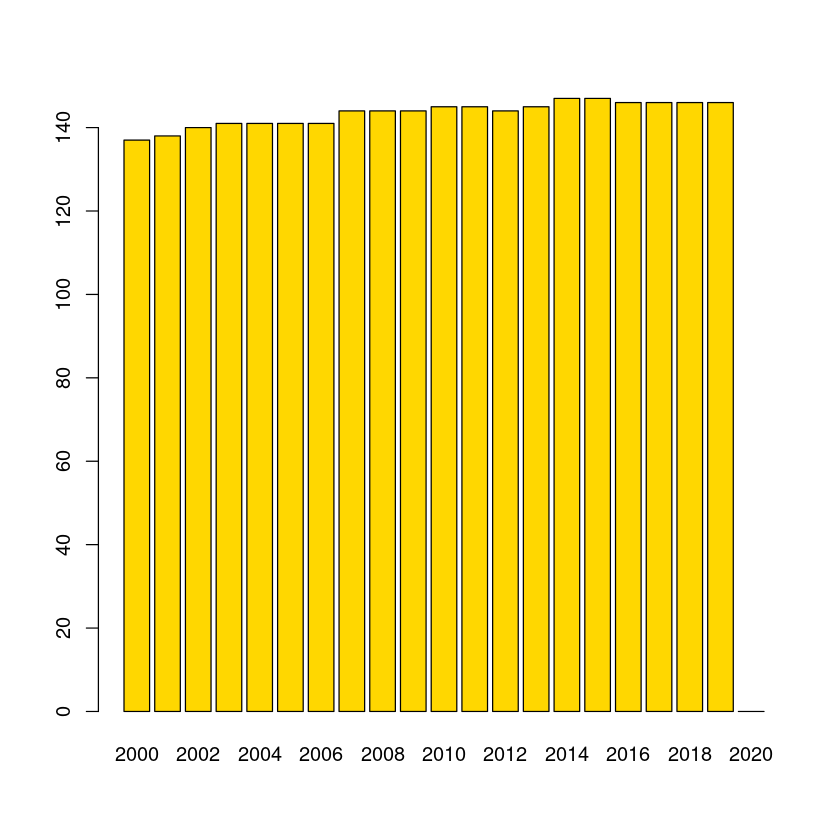

In [14]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

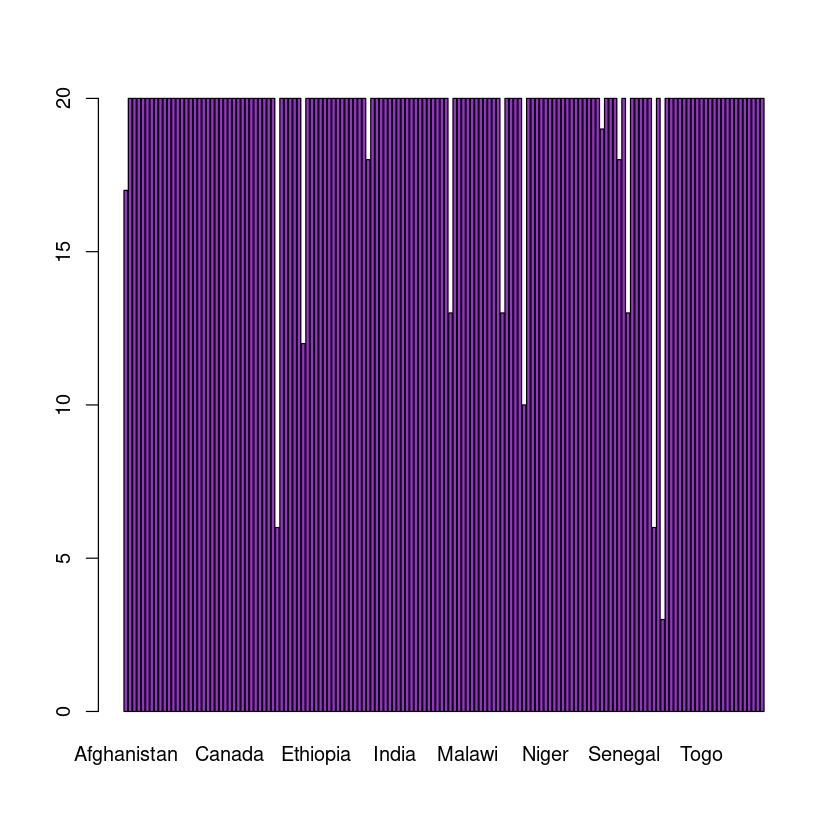

In [15]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


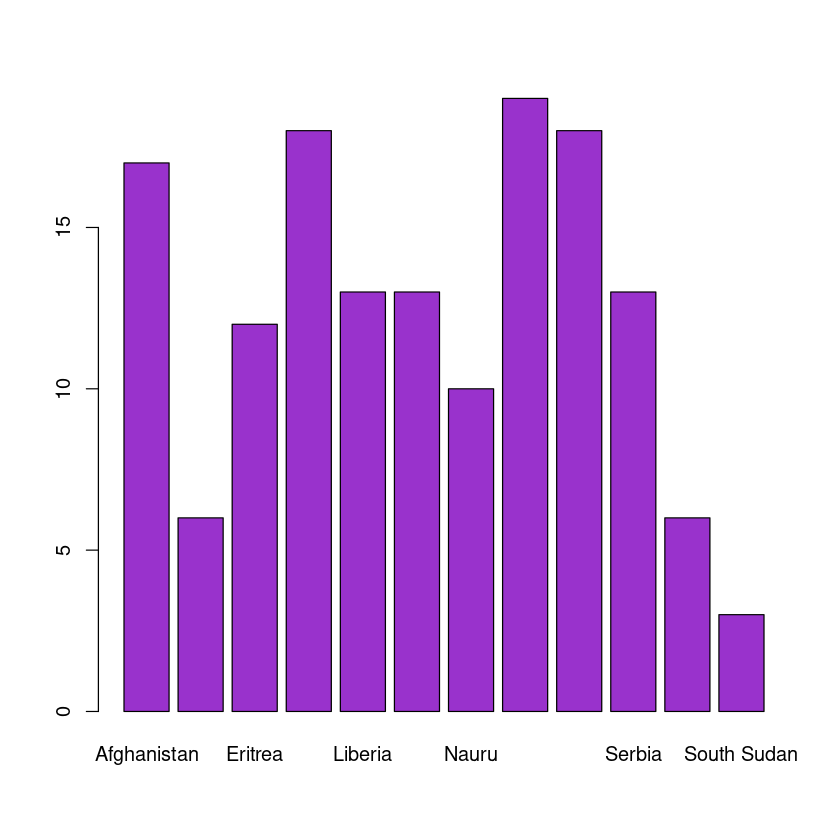

In [16]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [17]:
summary(complete_energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:2868        2014   : 147   Min.   :  1.252                        
 Class :character   2015   : 147   1st Qu.: 53.238                        
 Mode  :character   2016   : 146   Median : 97.000                        
                    2017   : 146   Mean   : 76.585                        
                    2018   : 146   3rd Qu.:100.000                        
                    2019   : 146   Max.   :100.000                        
                    (Other):1990                                          
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 22.07                   
 Median : 81.55                   
 Mean   : 62.17                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
                                  
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.000                                       

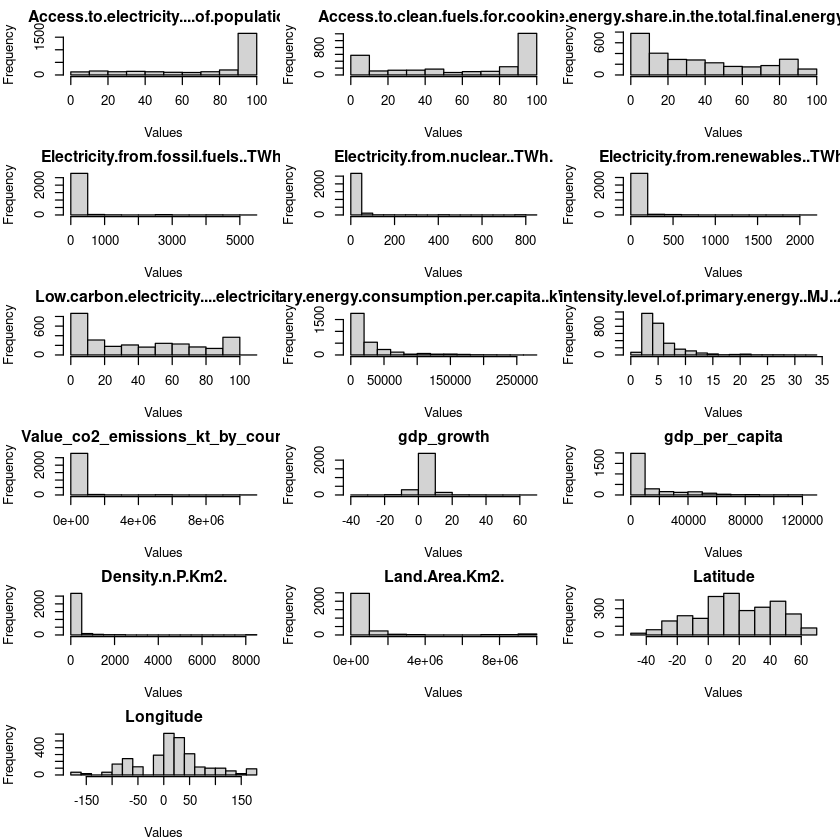

In [18]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

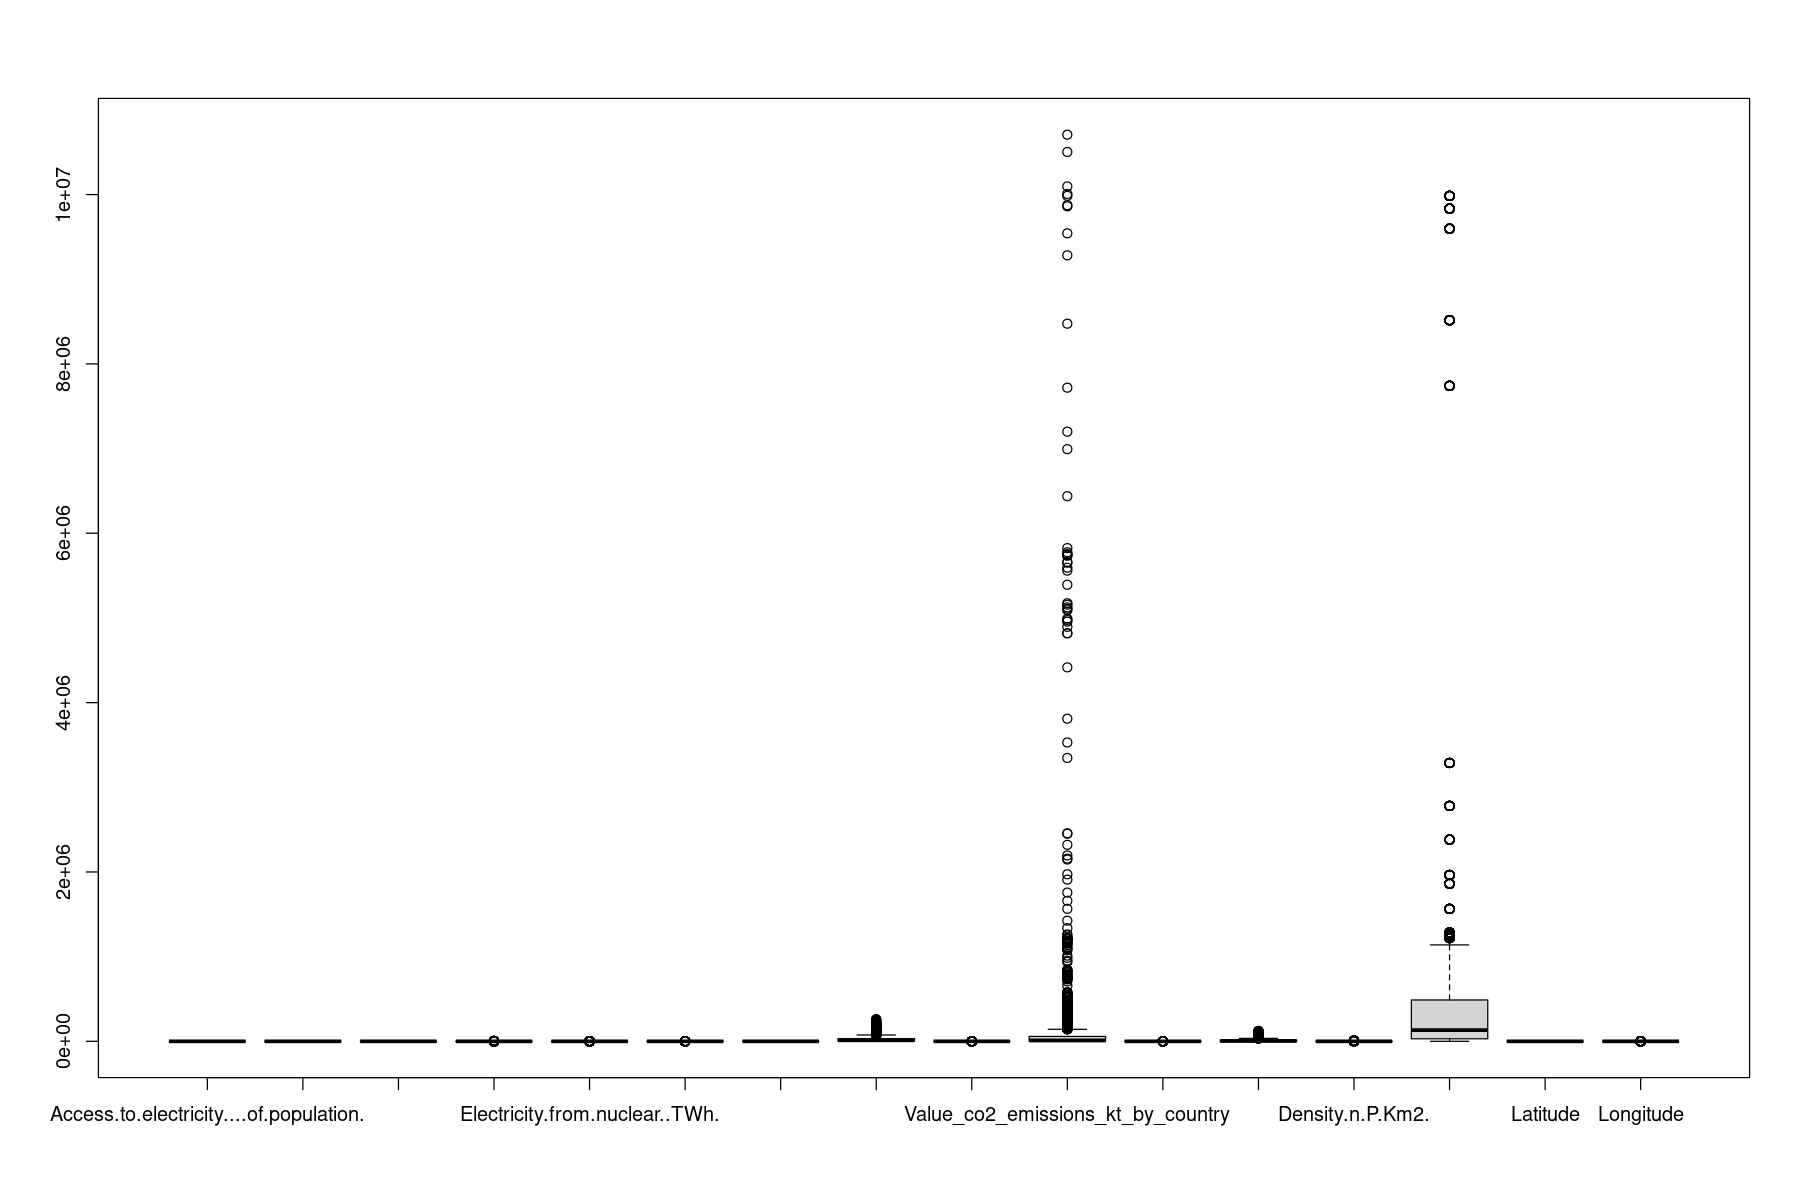

In [19]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

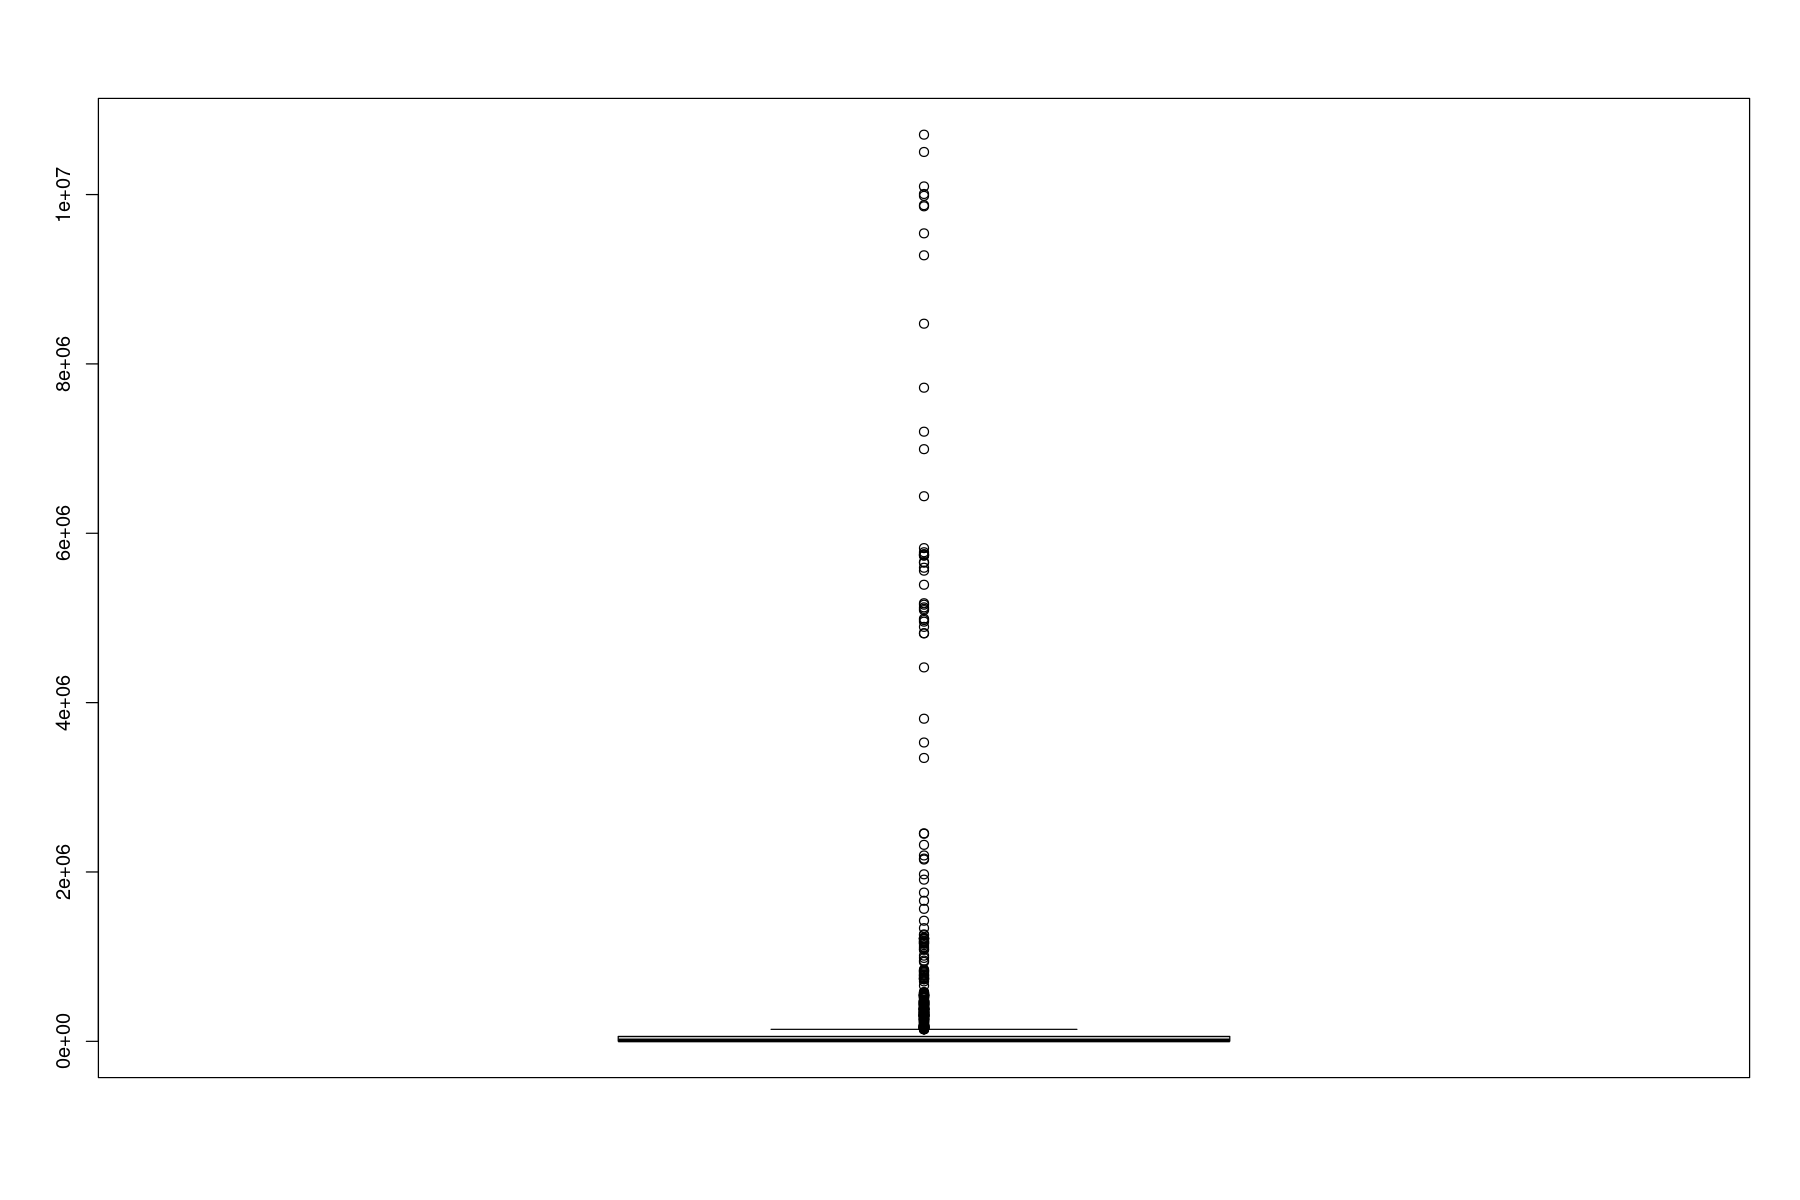

In [20]:
boxplot(df$Value_co2_emissions_kt_by_country)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


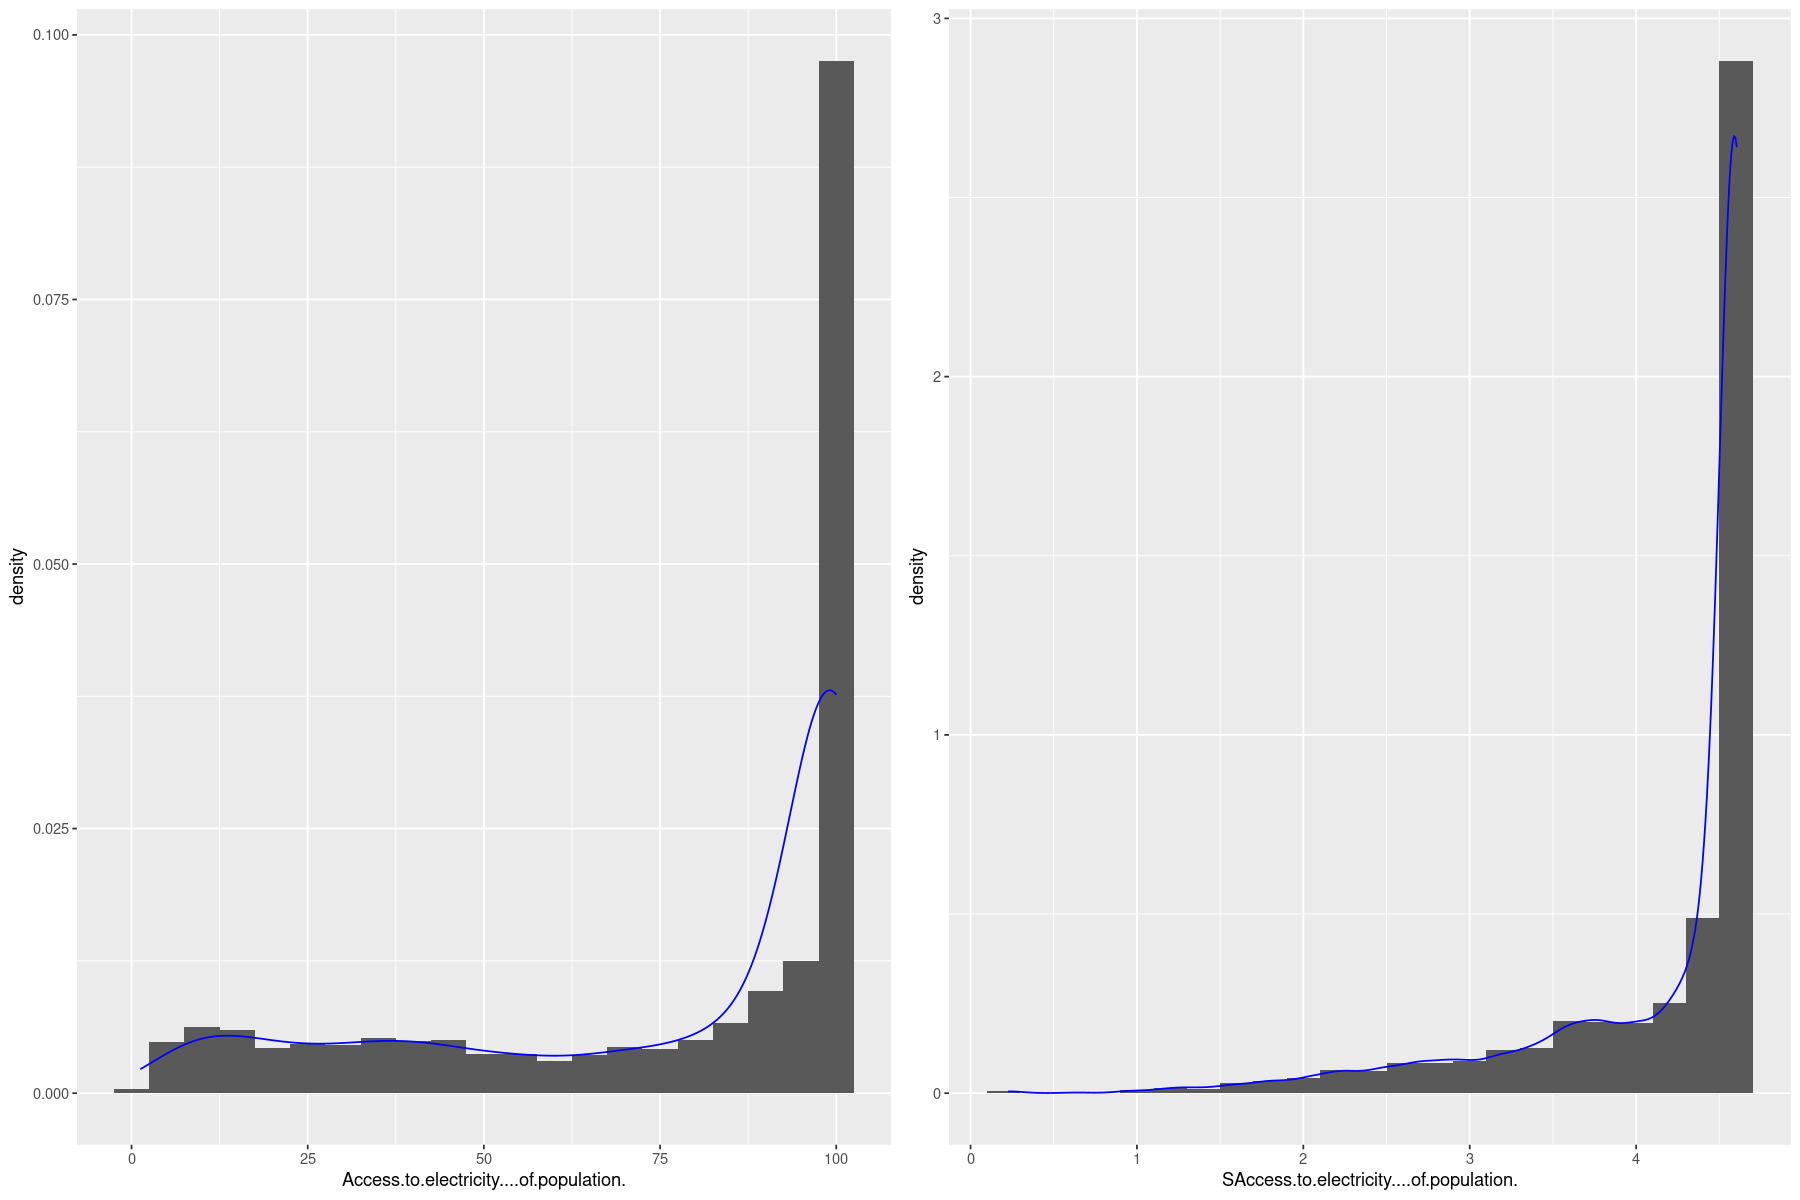

In [21]:
complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

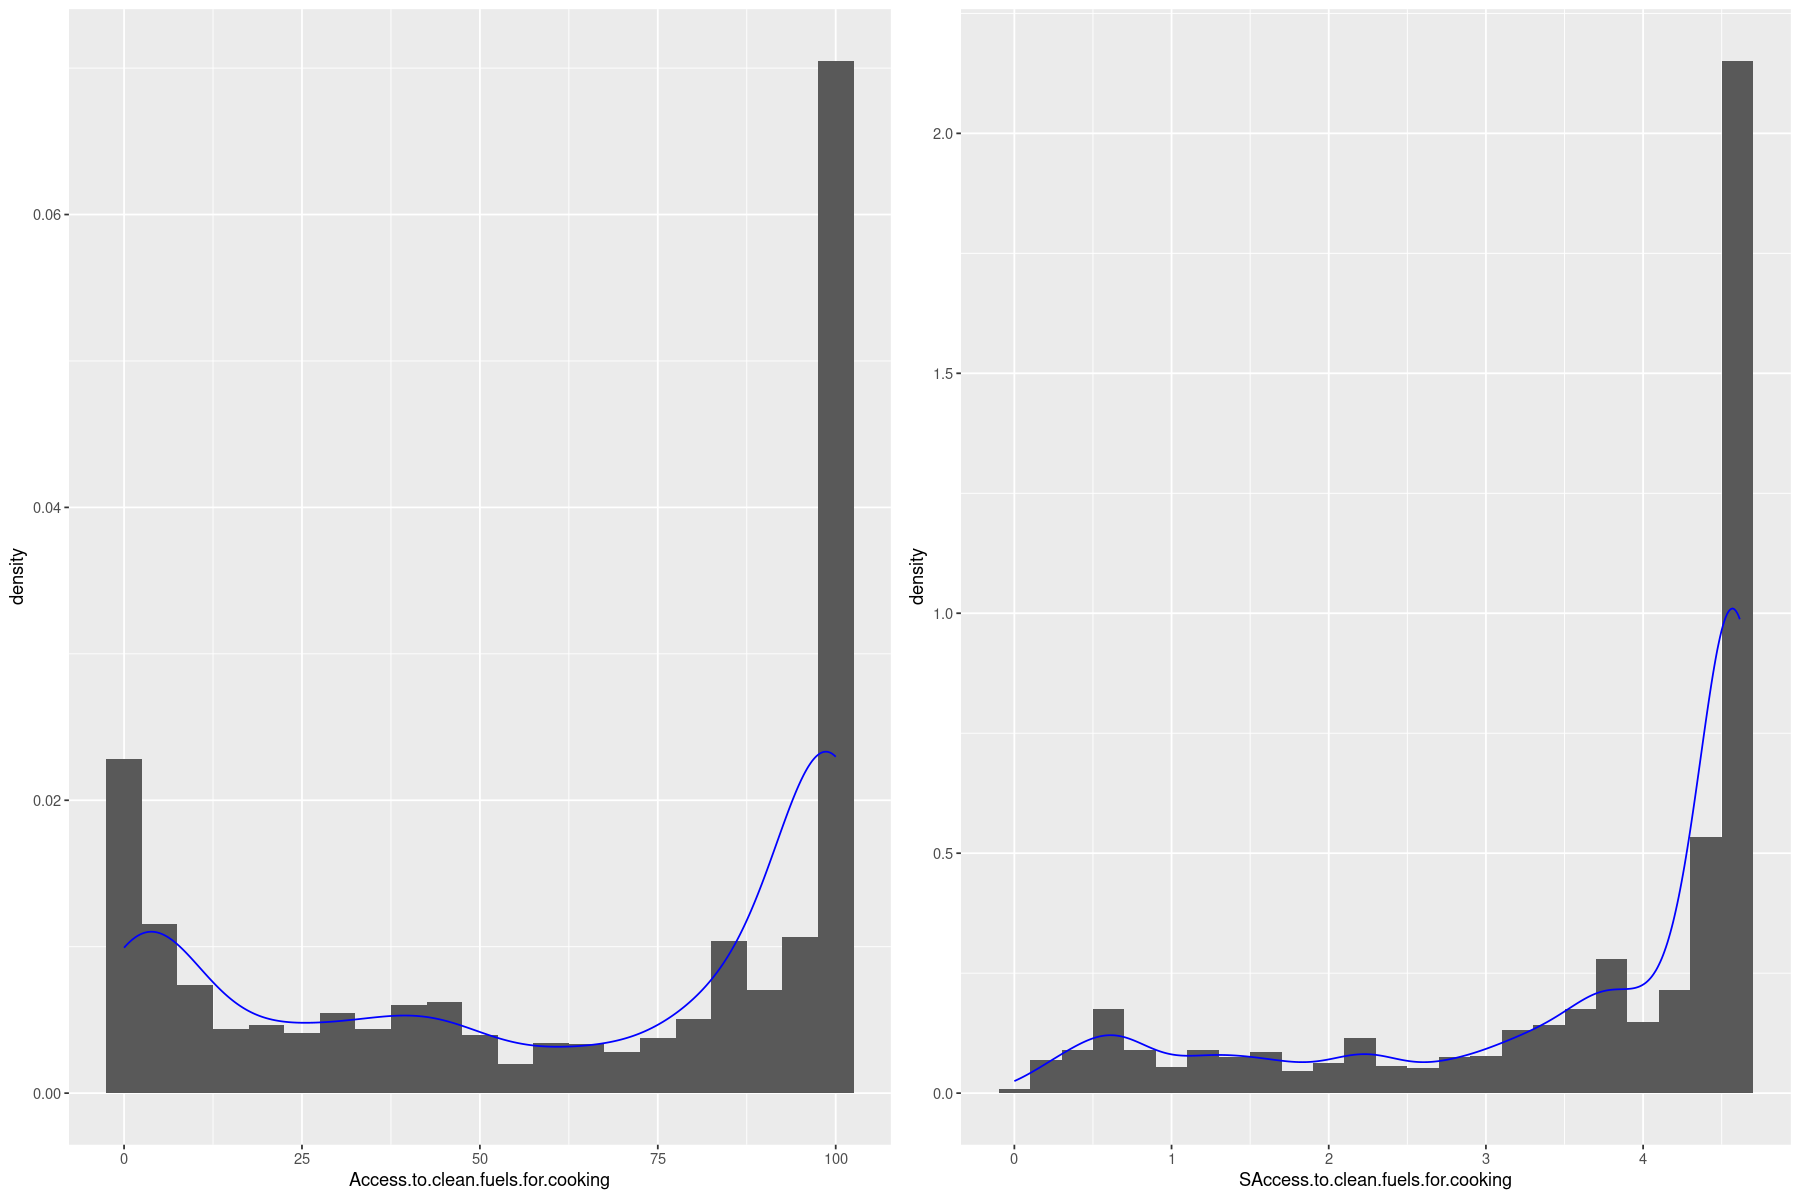

In [22]:
complete_energy[, "SAccess.to.clean.fuels.for.cooking"] = log(complete_energy[, "Access.to.clean.fuels.for.cooking"]+1)

g1 = ggplot(complete_energy,aes(x=Access.to.clean.fuels.for.cooking))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess.to.clean.fuels.for.cooking))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

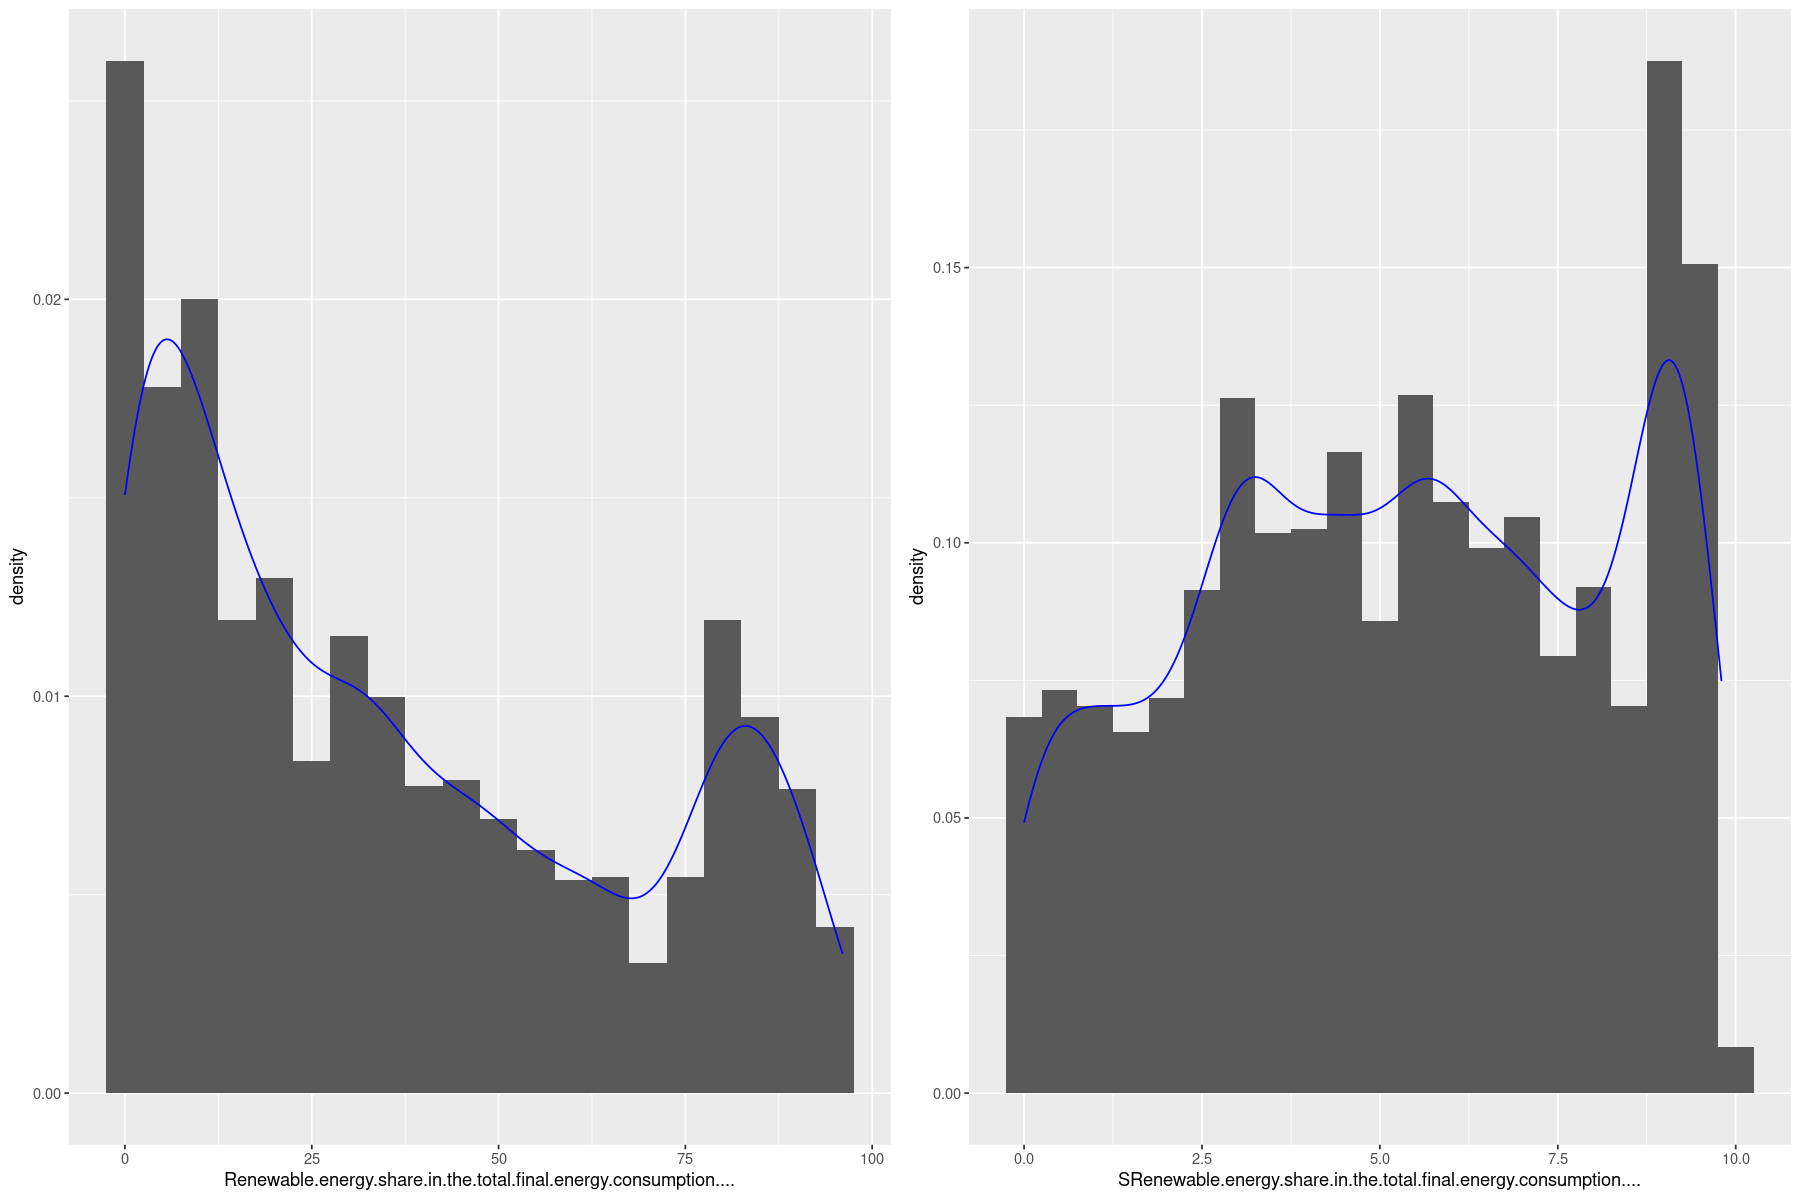

In [23]:
complete_energy[, "SRenewable.energy.share.in.the.total.final.energy.consumption...."] = sqrt(complete_energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])

g1 = ggplot(complete_energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable.energy.share.in.the.total.final.energy.consumption....))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

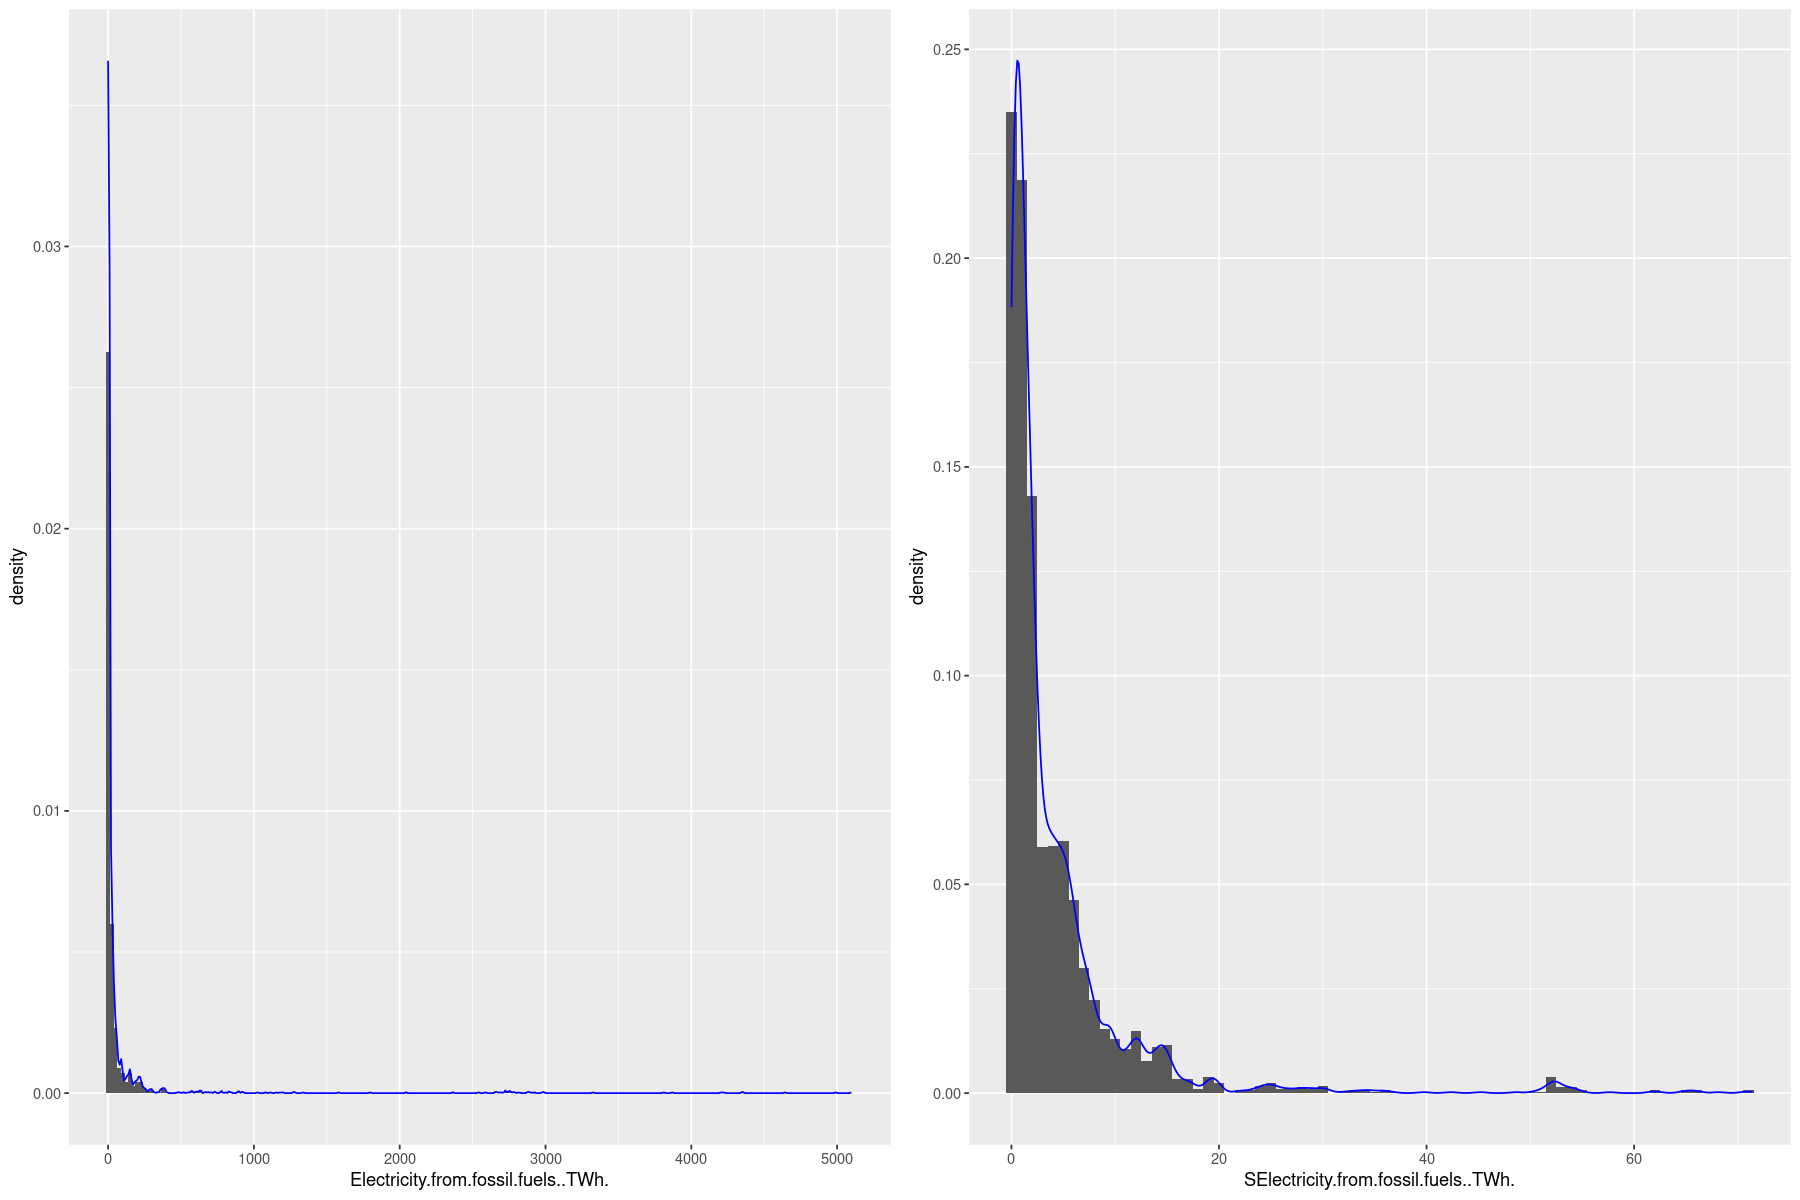

In [24]:
complete_energy[, "SElectricity.from.fossil.fuels..TWh."] = sqrt(complete_energy[, "Electricity.from.fossil.fuels..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.fossil.fuels..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.fossil.fuels..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

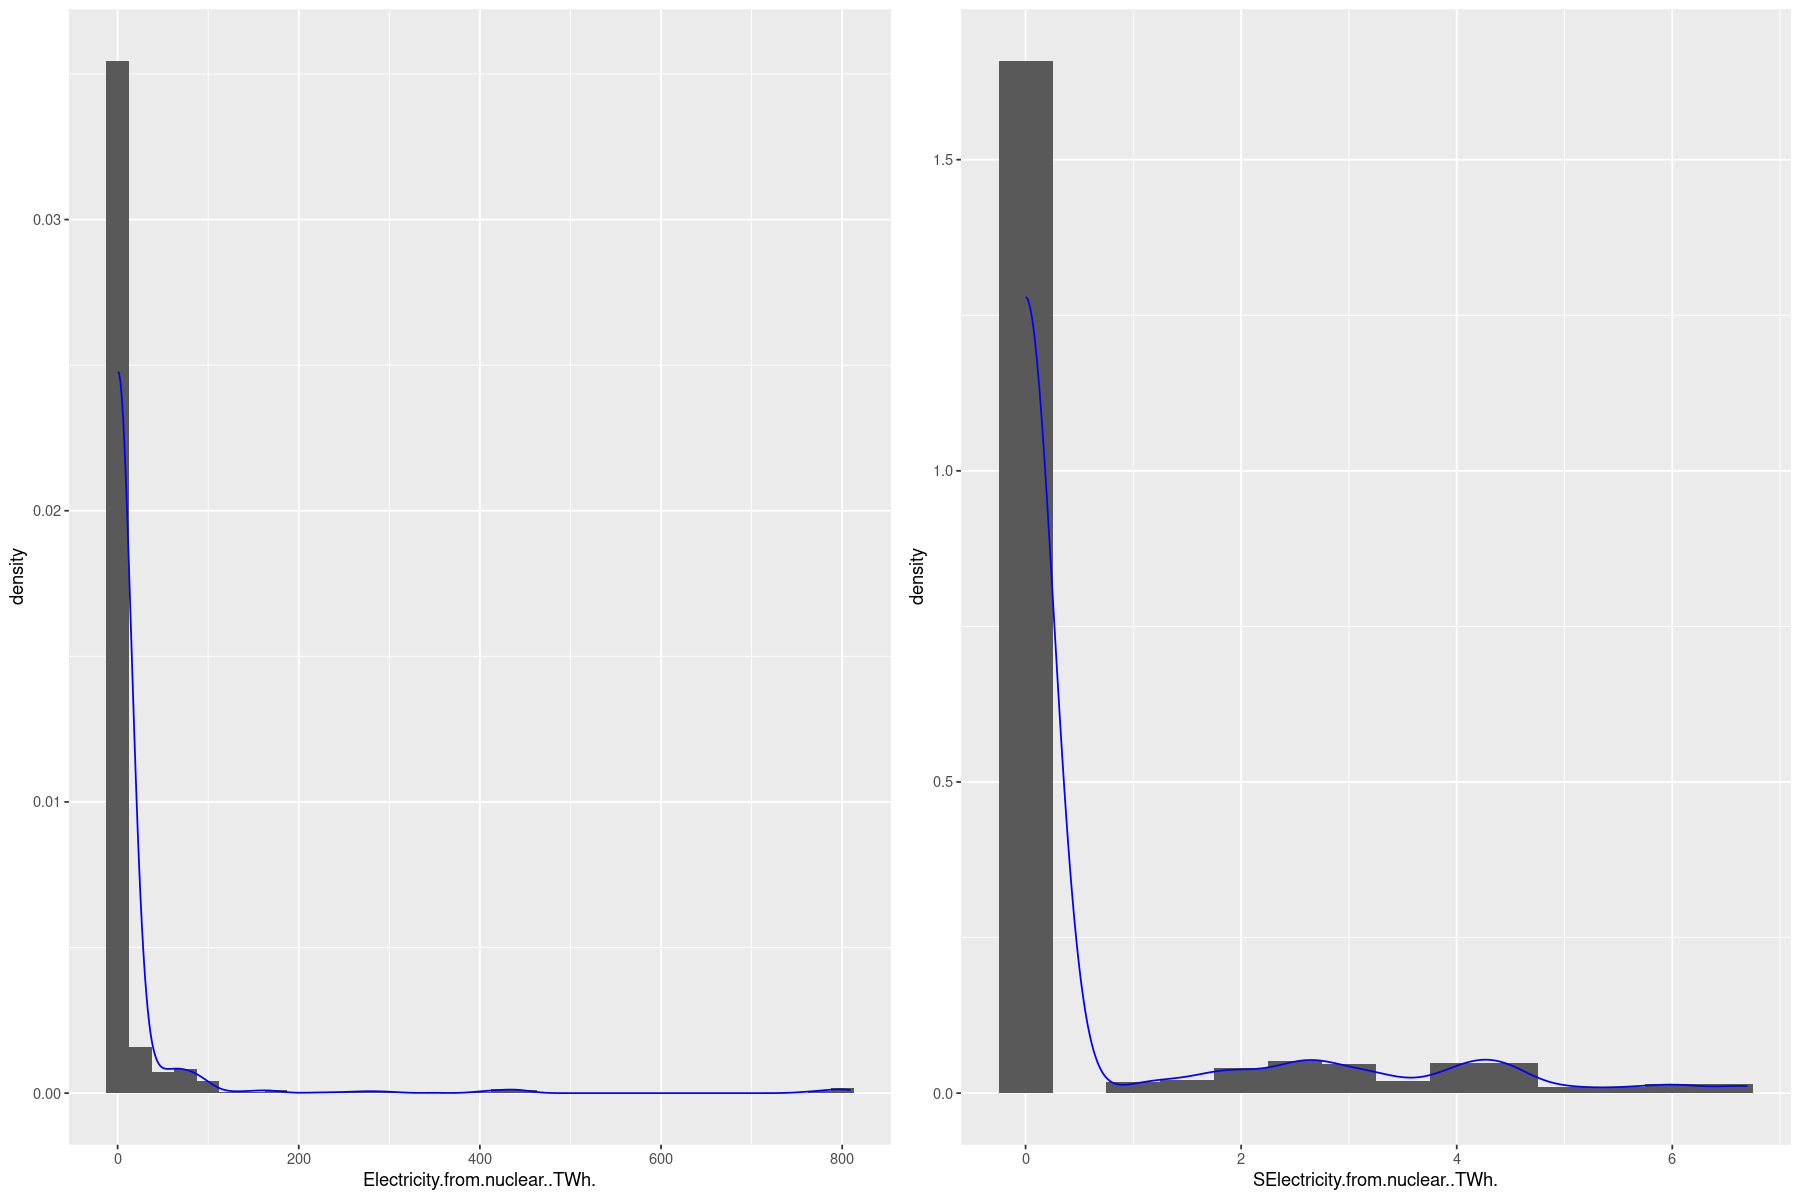

In [25]:
complete_energy[, "SElectricity.from.nuclear..TWh."] = log(1+complete_energy[, "Electricity.from.nuclear..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.nuclear..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.nuclear..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

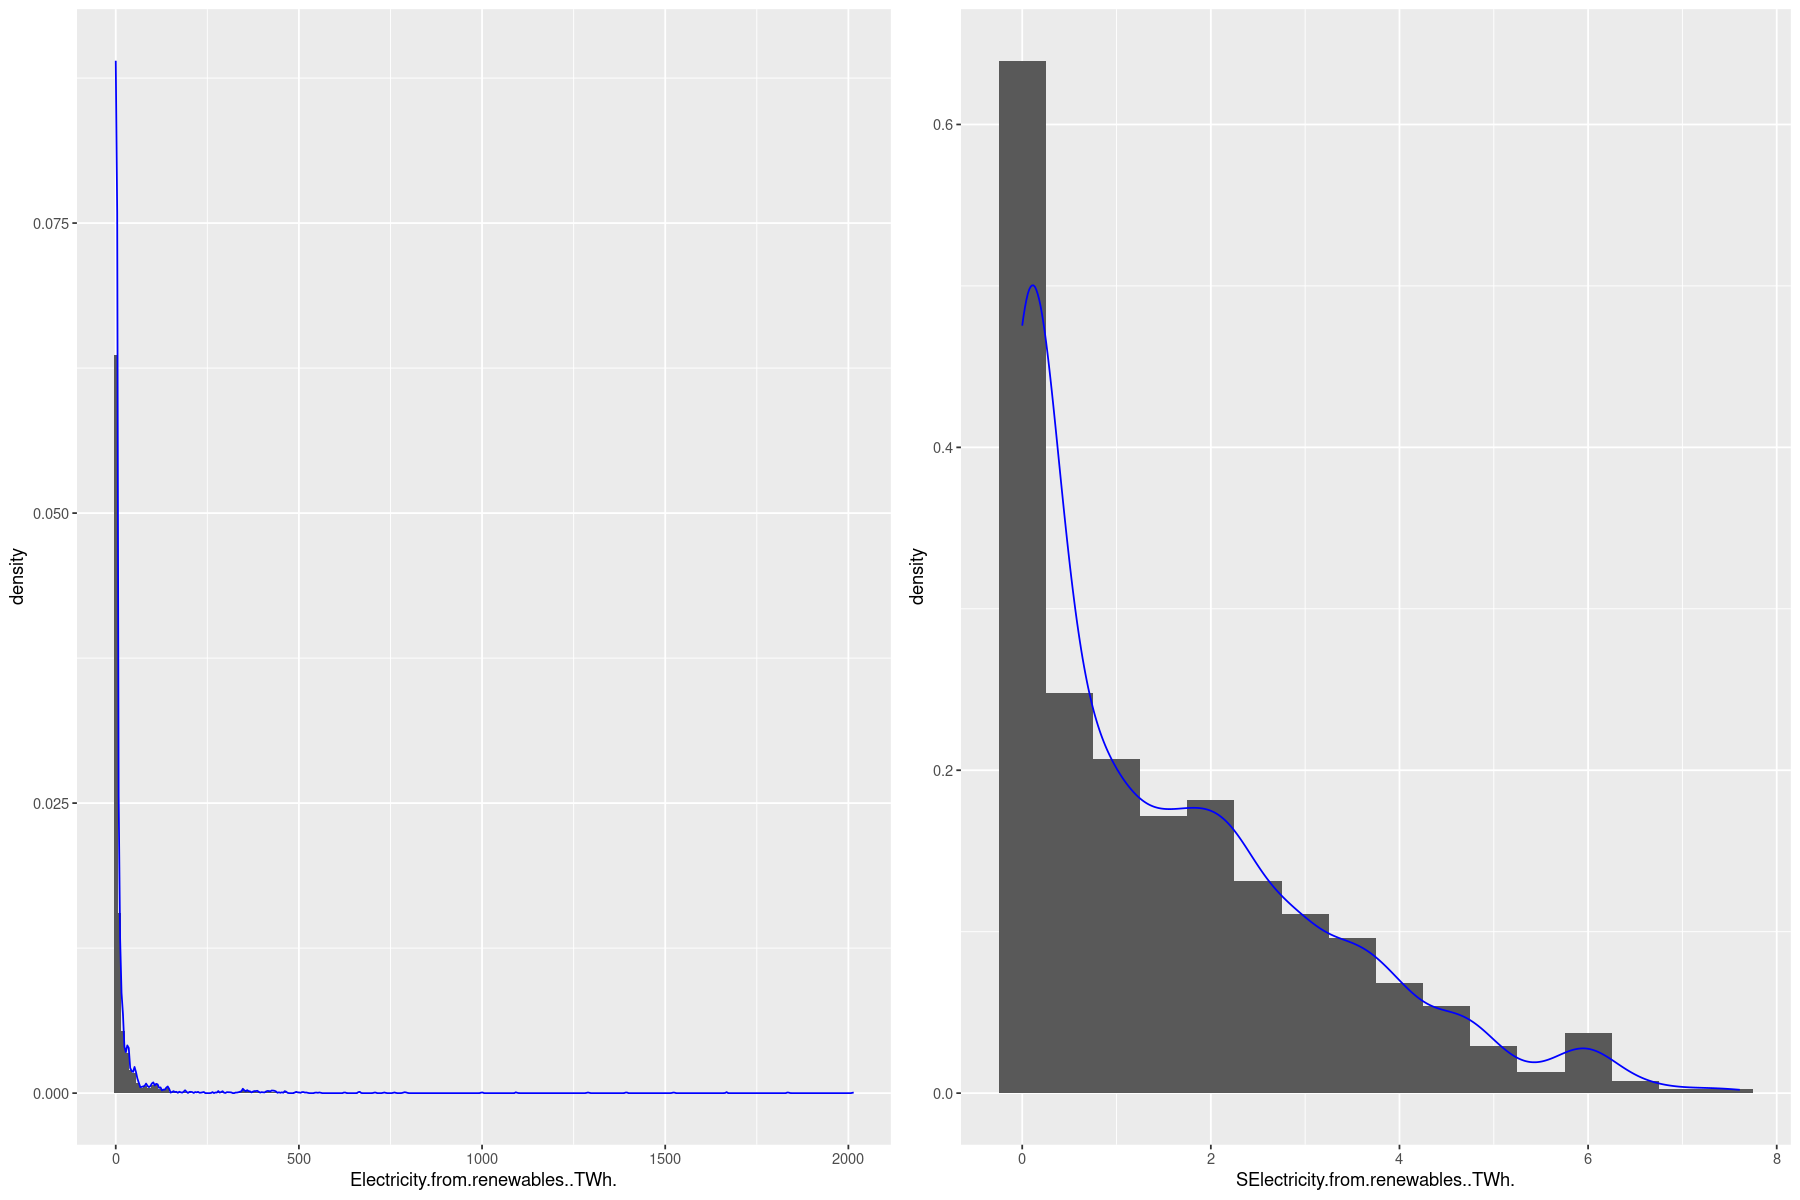

In [26]:
complete_energy[, "SElectricity.from.renewables..TWh."] = log(1+complete_energy[, "Electricity.from.renewables..TWh."])

g1 = ggplot(complete_energy,aes(x=Electricity.from.renewables..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElectricity.from.renewables..TWh.))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

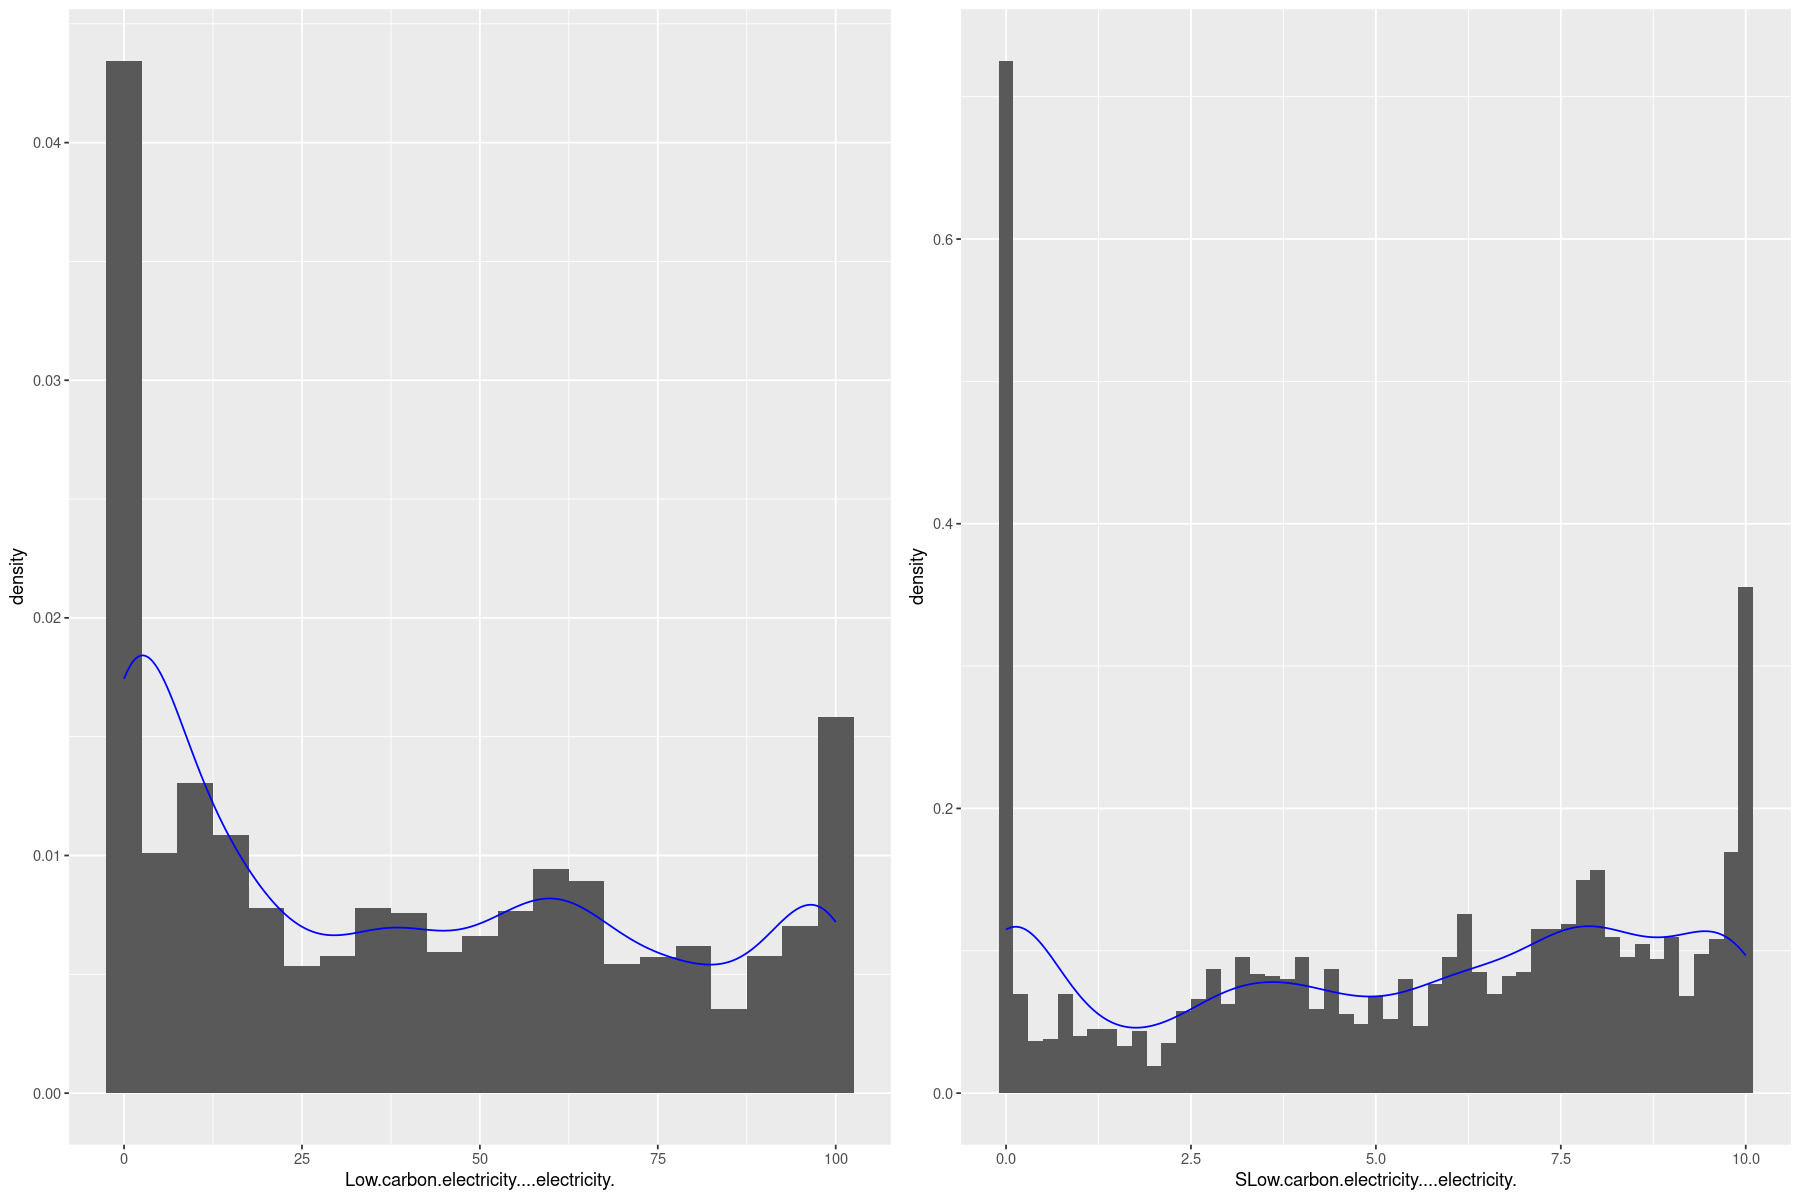

In [27]:
complete_energy[, "SLow.carbon.electricity....electricity."] = sqrt(complete_energy[, "Low.carbon.electricity....electricity."])

g1 = ggplot(complete_energy,aes(x=Low.carbon.electricity....electricity.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow.carbon.electricity....electricity.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

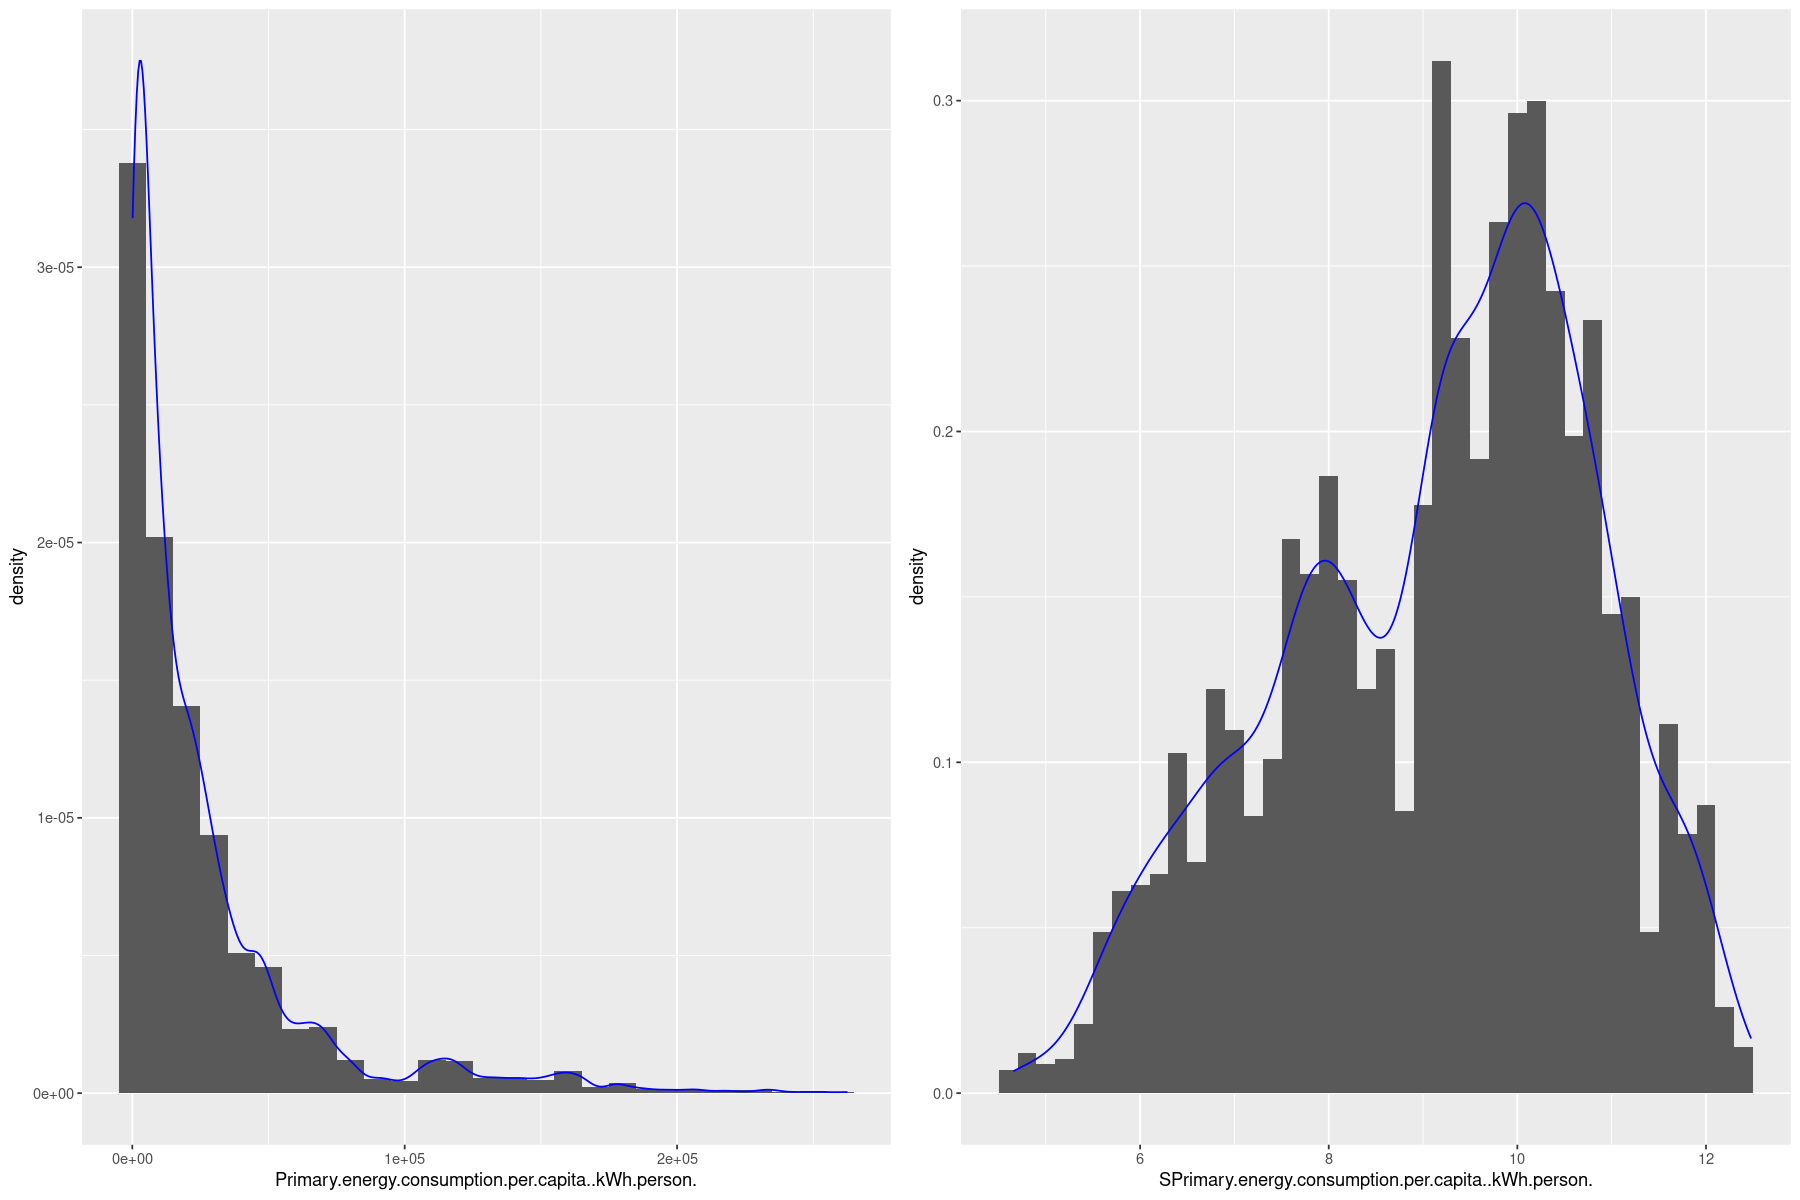

In [28]:
complete_energy[, "SPrimary.energy.consumption.per.capita..kWh.person."] = log(complete_energy[, "Primary.energy.consumption.per.capita..kWh.person."])

g1 = ggplot(complete_energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary.energy.consumption.per.capita..kWh.person.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

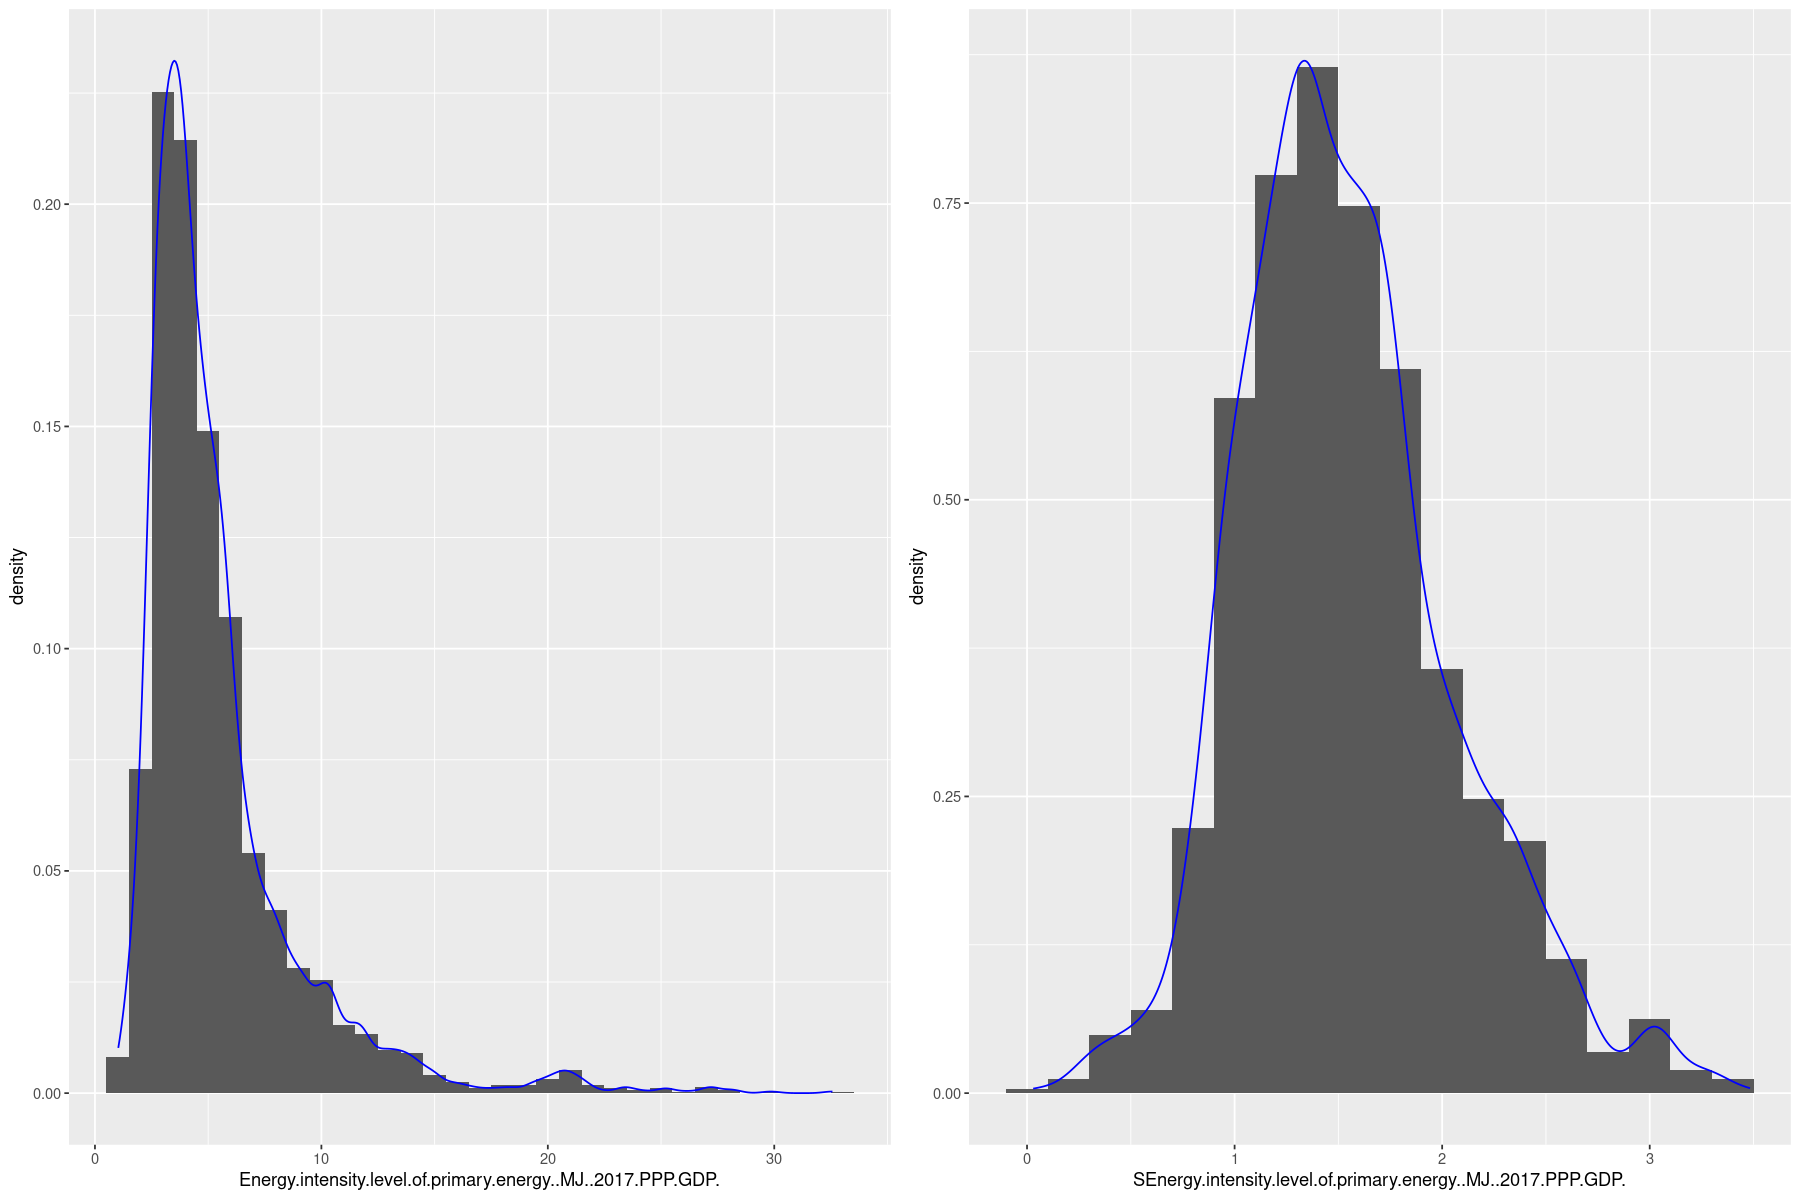

In [29]:
complete_energy[, "SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."] = log(complete_energy[, "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."])

g1 = ggplot(complete_energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

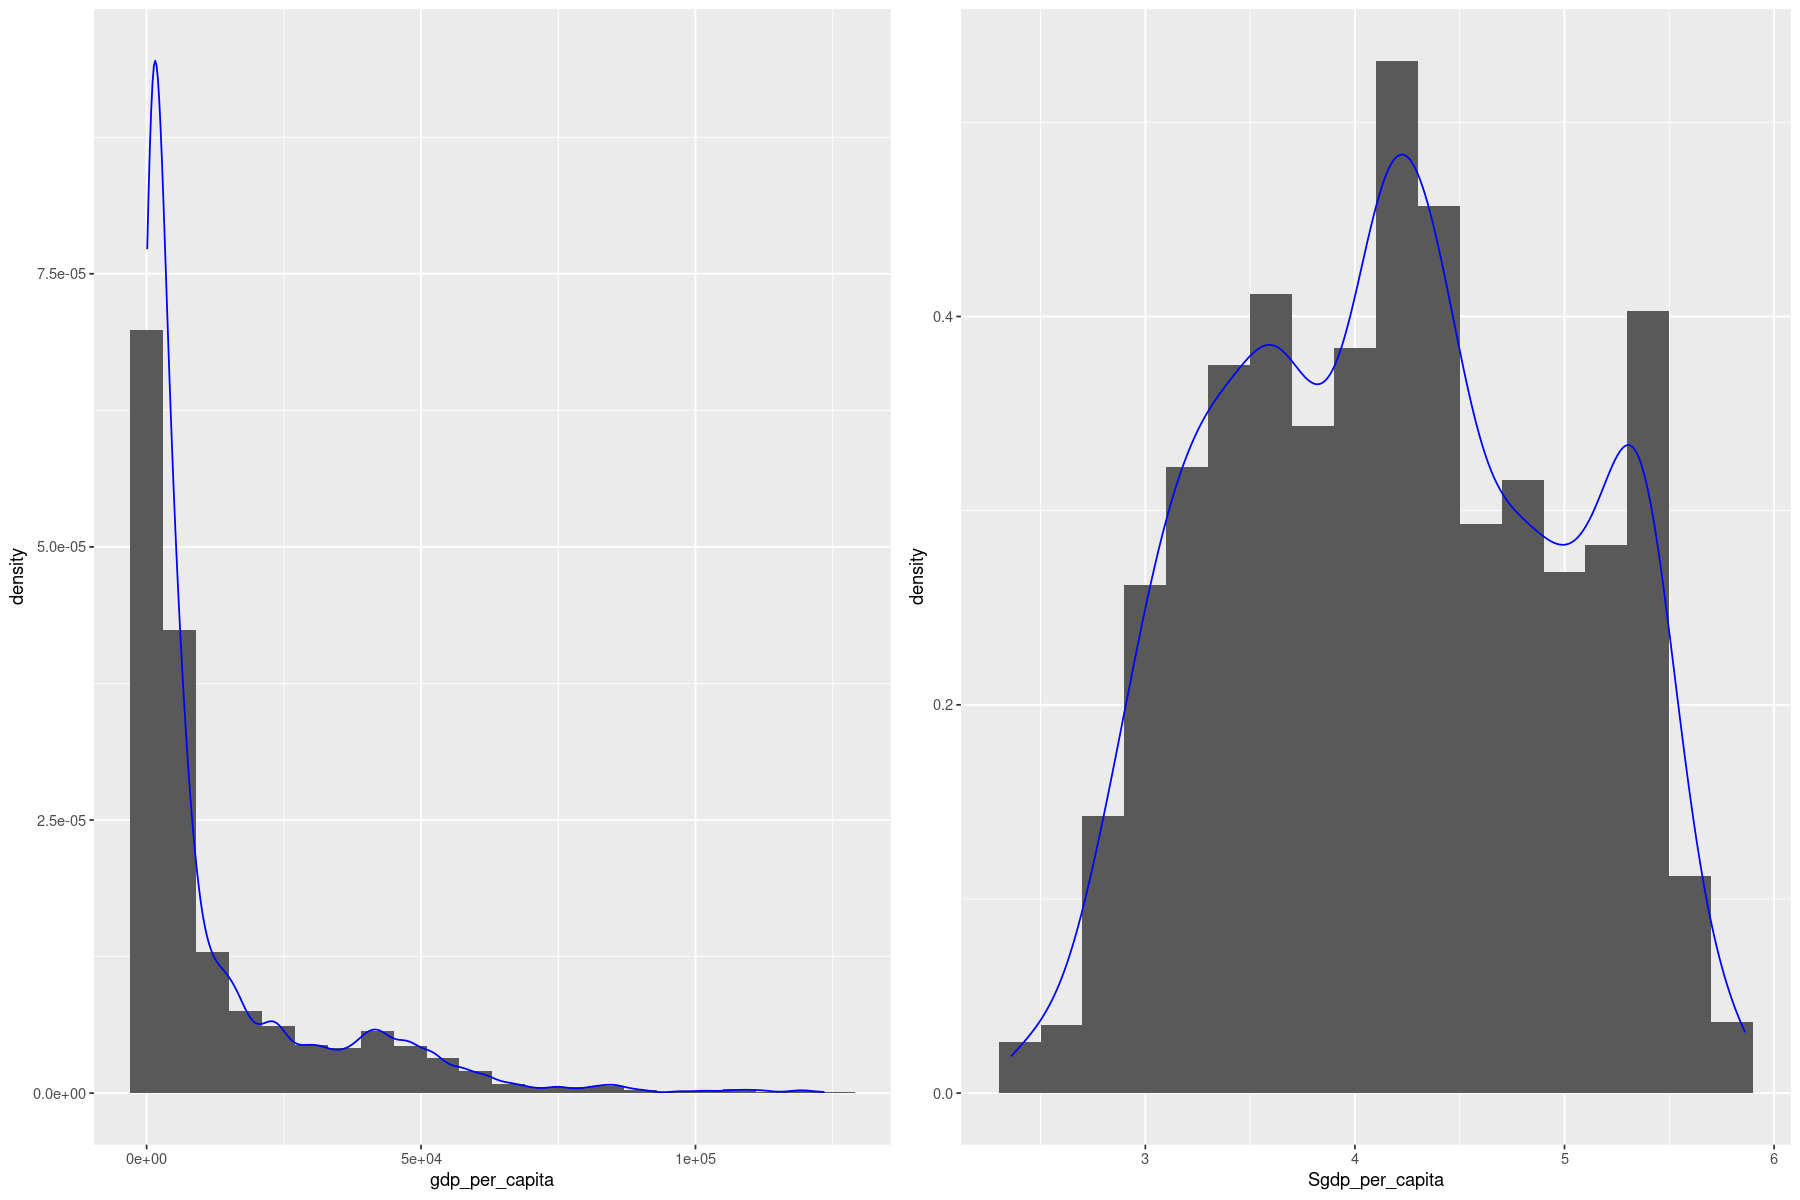

In [30]:
complete_energy[, "Sgdp_per_capita"] = log(sqrt(complete_energy[, "gdp_per_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_per_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_per_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

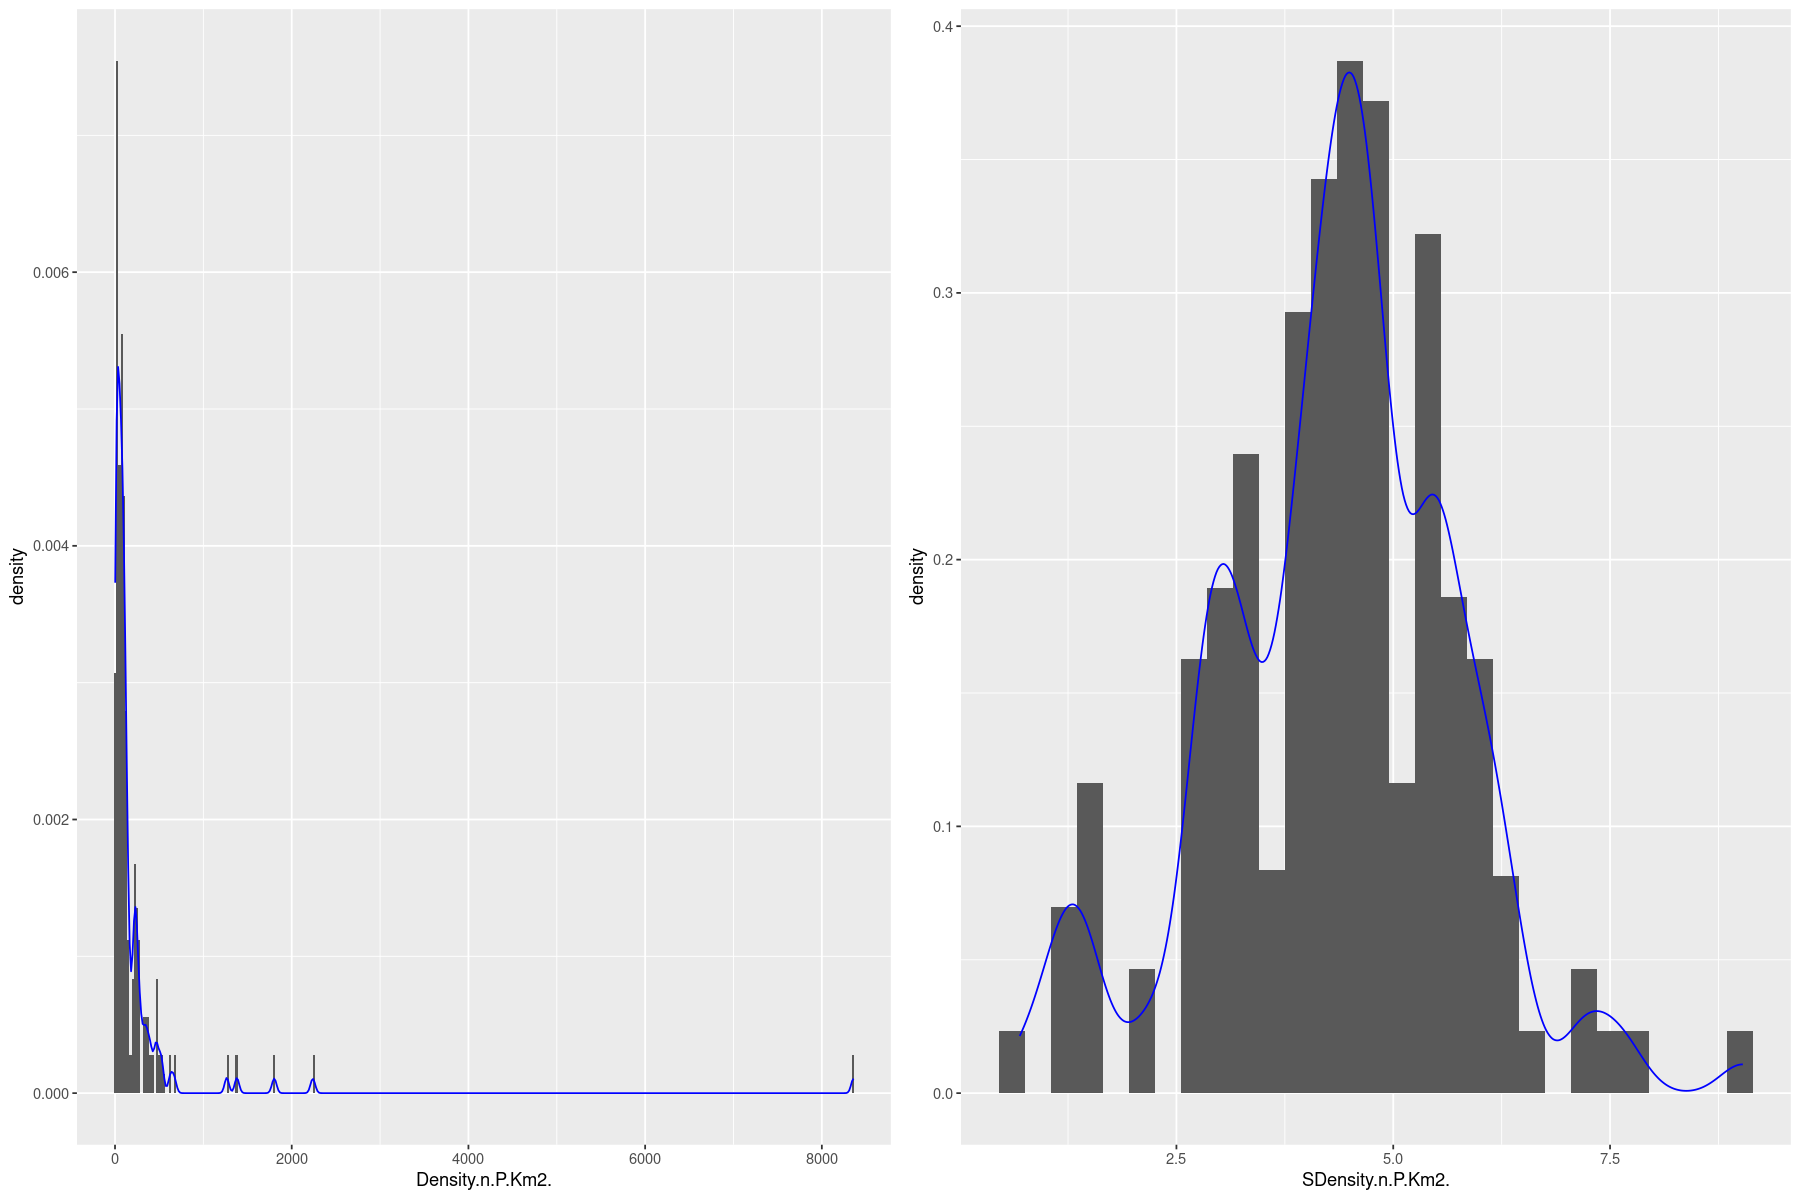

In [31]:
complete_energy[, "SDensity.n.P.Km2."] = log(complete_energy[, "Density.n.P.Km2."])

g1 = ggplot(complete_energy,aes(x=Density.n.P.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity.n.P.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

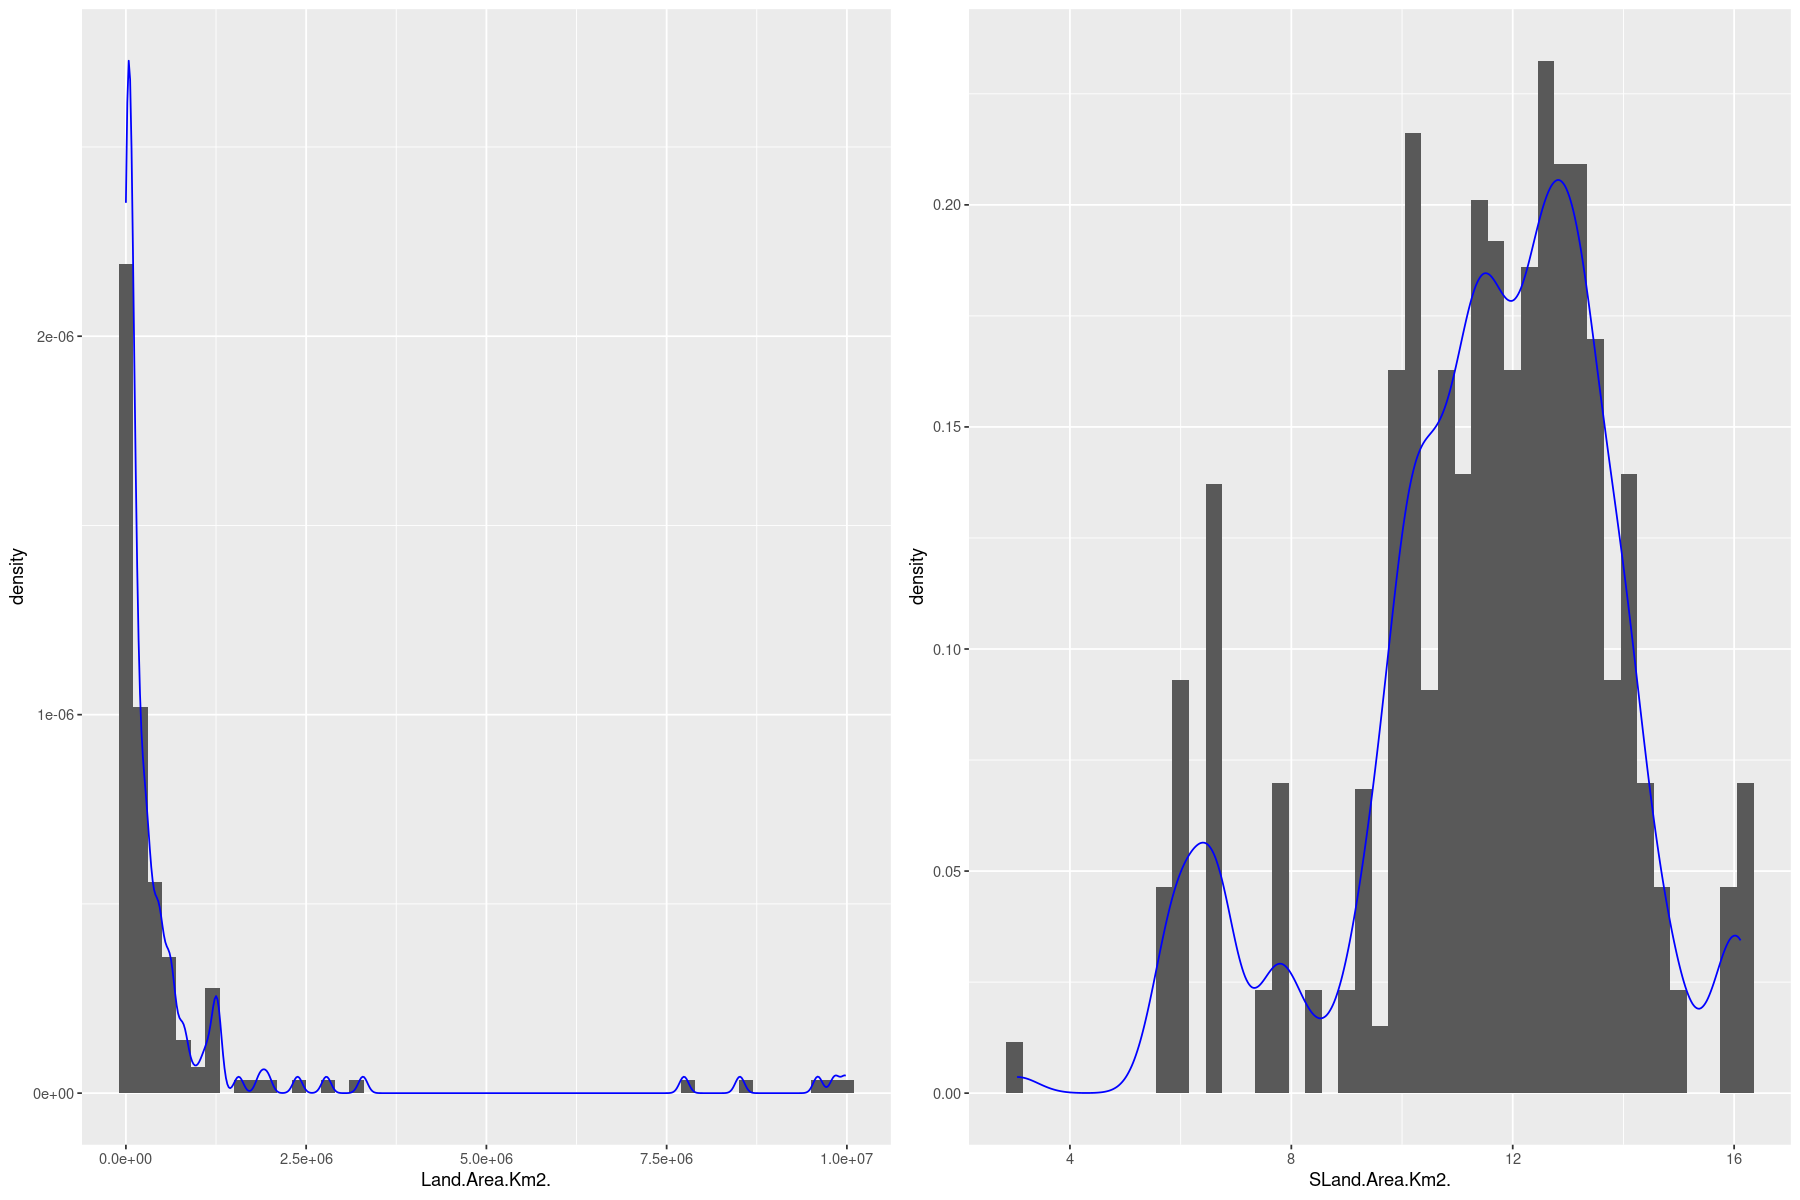

In [32]:
complete_energy[, "SLand.Area.Km2."] = log(complete_energy[, "Land.Area.Km2."])

g1 = ggplot(complete_energy,aes(x=Land.Area.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand.Area.Km2.))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

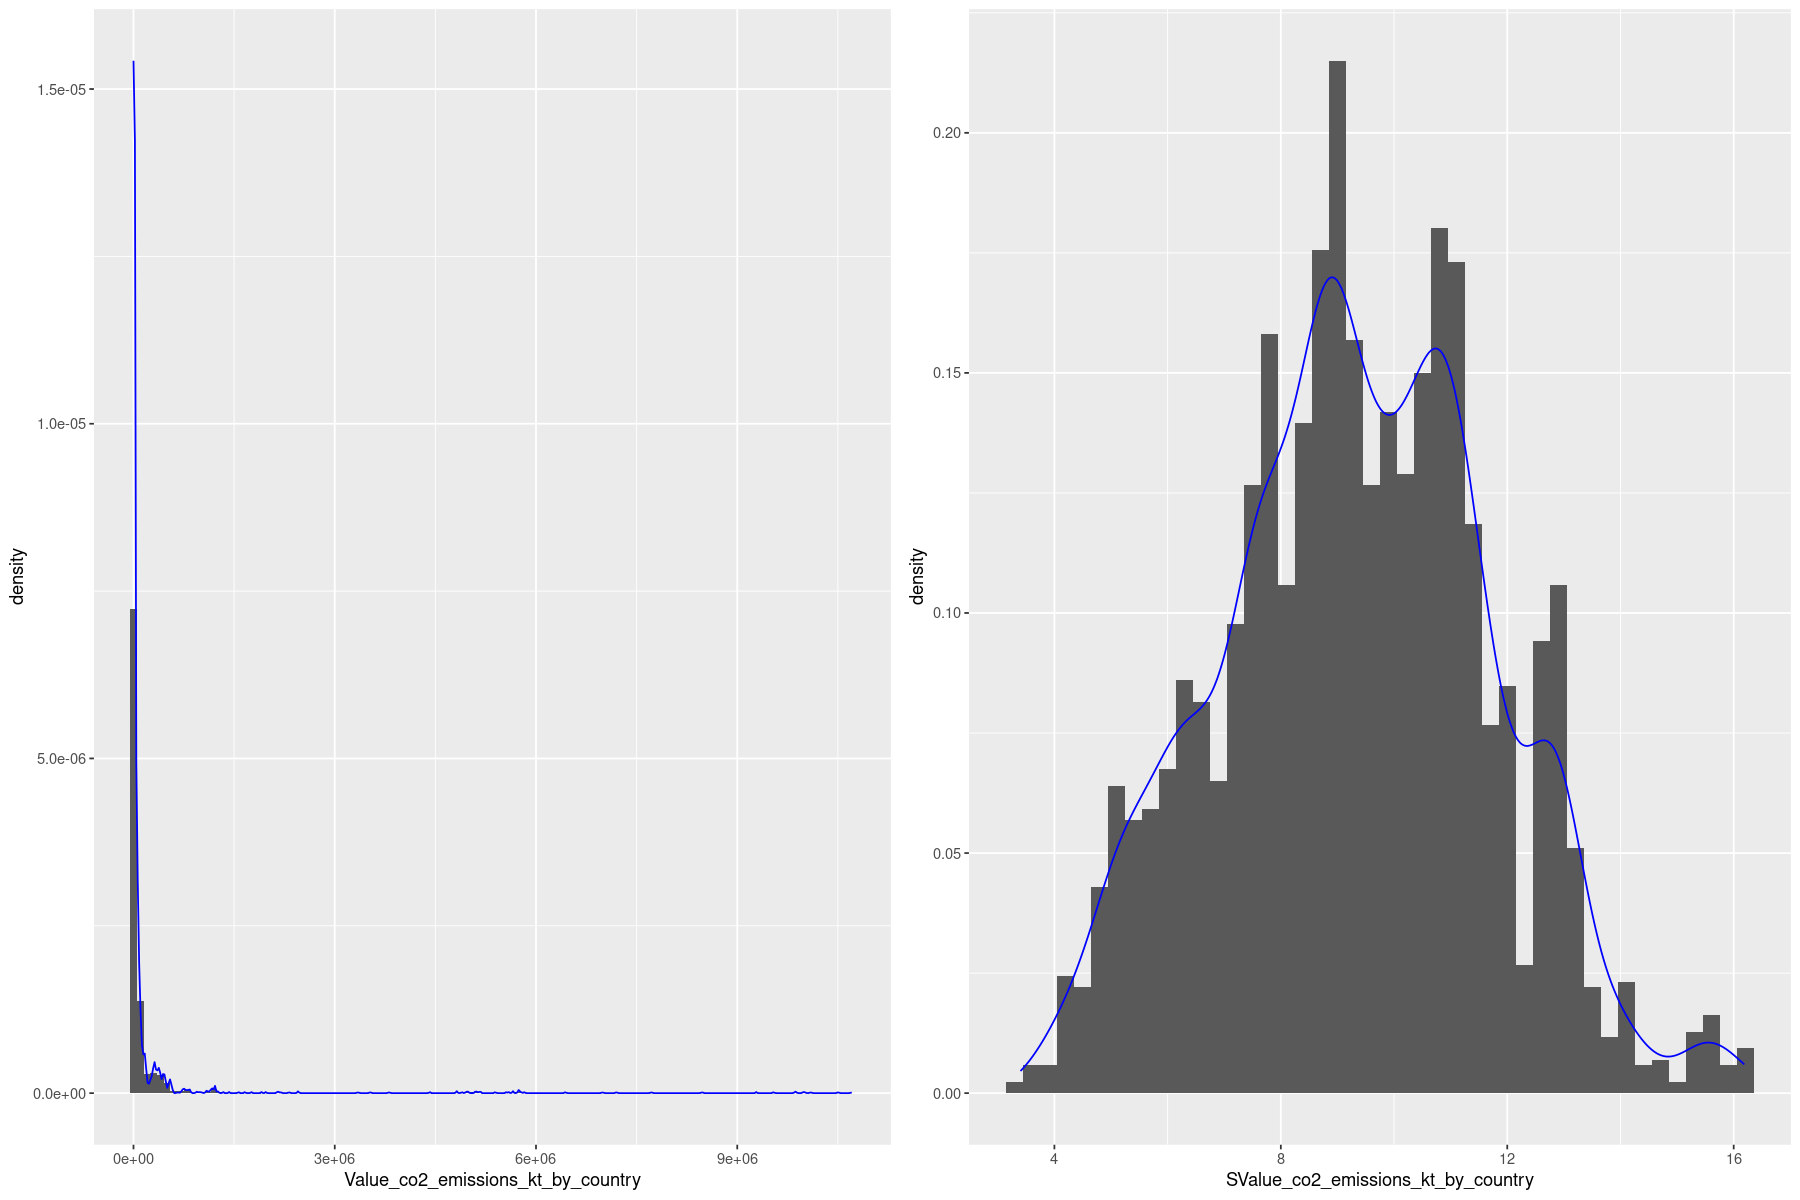

In [33]:
complete_energy[, "SValue_co2_emissions_kt_by_country"] = log(complete_energy[, "Value_co2_emissions_kt_by_country"])

g1 = ggplot(complete_energy,aes(x=Value_co2_emissions_kt_by_country))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2_emissions_kt_by_country))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

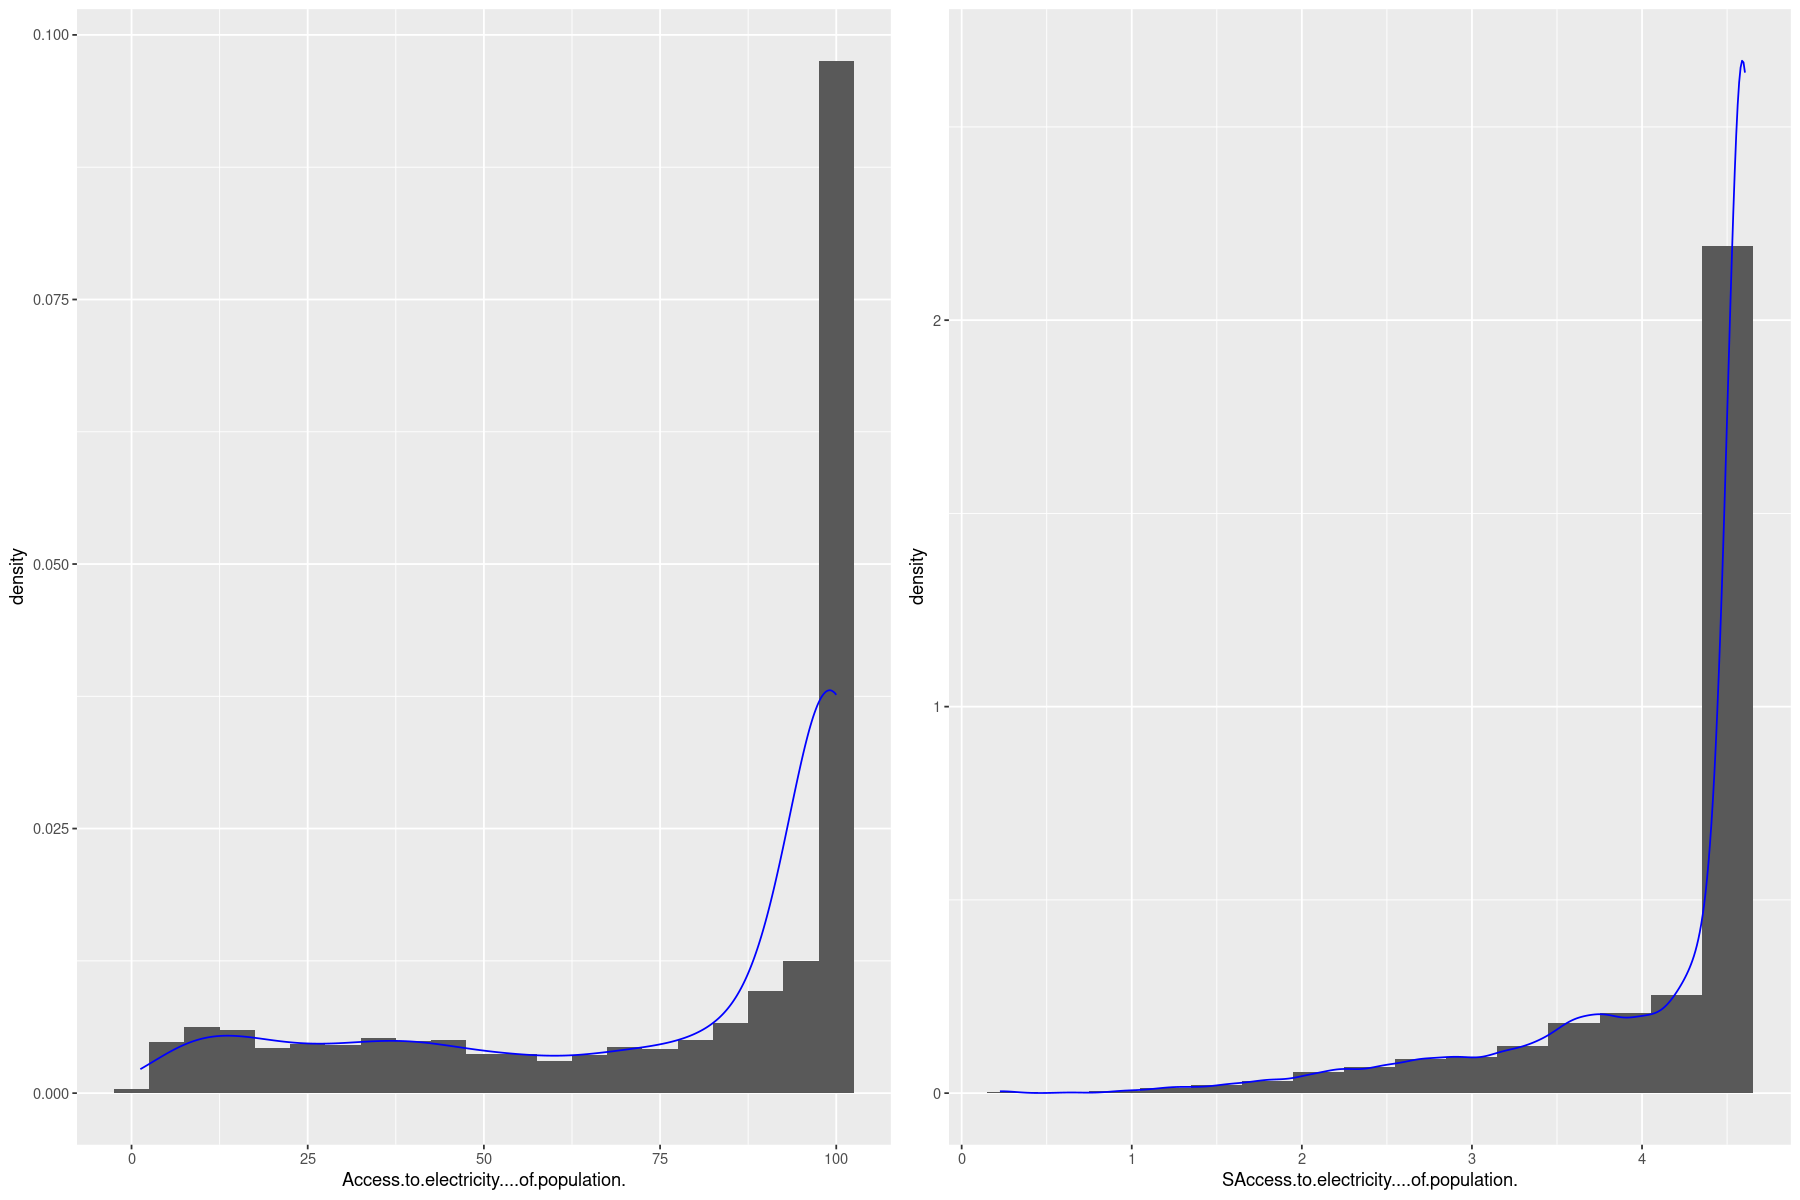

In [34]:
complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [35]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [36]:
#summary(complete_energy)

In [37]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [38]:
summary(complete_energy)

    Entity               Year      Value_co2_emissions_kt_by_country
 Length:2868        2014   : 147   Min.   :      30                 
 Class :character   2015   : 147   1st Qu.:    2188                 
 Mode  :character   2016   : 146   Median :   10425                 
                    2017   : 146   Mean   :  168818                 
                    2018   : 146   3rd Qu.:   58145                 
                    2019   : 146   Max.   :10707220                 
                    (Other):1990                                    
   gdp_growth         Latitude         Longitude      
 Min.   :-36.658   Min.   :-40.901   Min.   :-175.20  
 1st Qu.:  1.771   1st Qu.:  1.651   1st Qu.: -10.94  
 Median :  3.788   Median : 17.061   Median :  18.64  
 Mean   :  3.895   Mean   : 18.140   Mean   :  12.97  
 3rd Qu.:  5.957   3rd Qu.: 39.400   3rd Qu.:  43.68  
 Max.   : 63.380   Max.   : 64.963   Max.   : 178.07  
                                                      
 SAccess

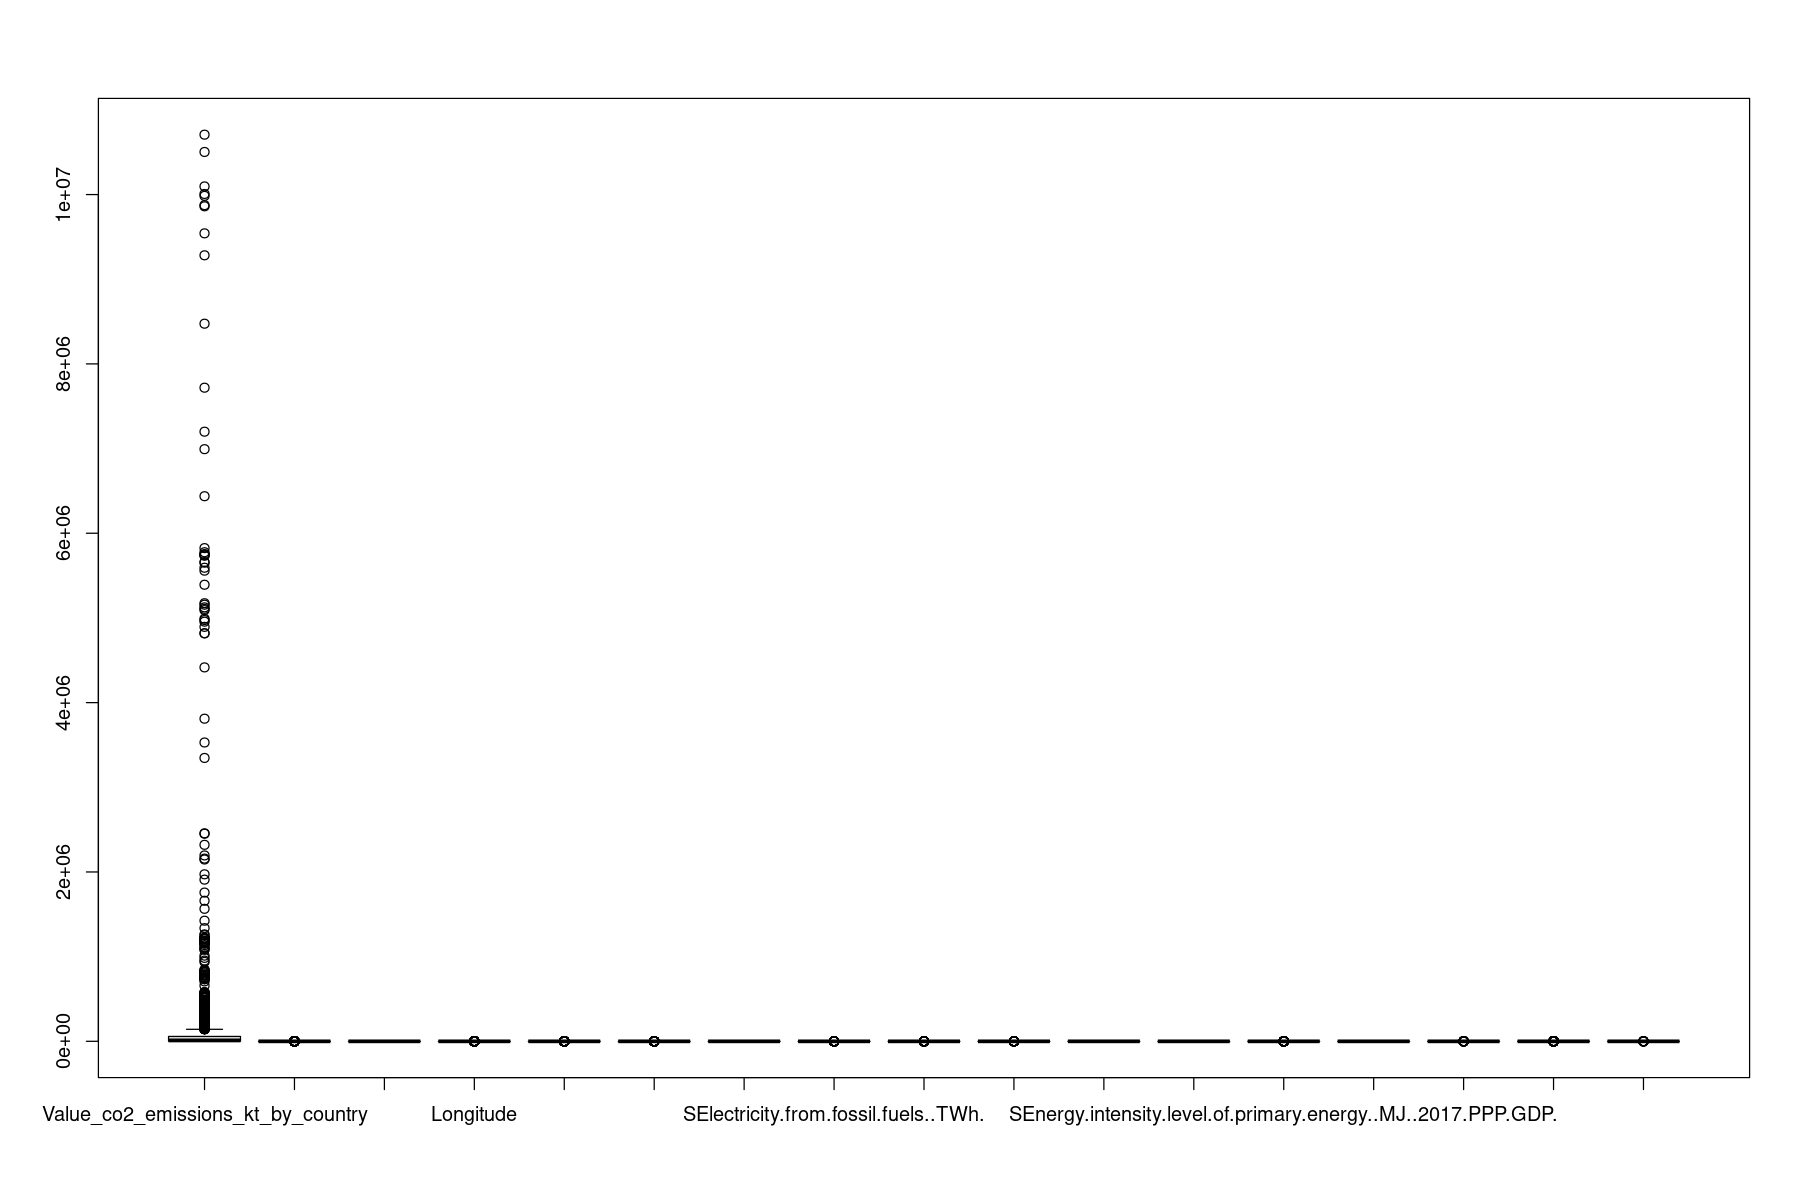

In [39]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

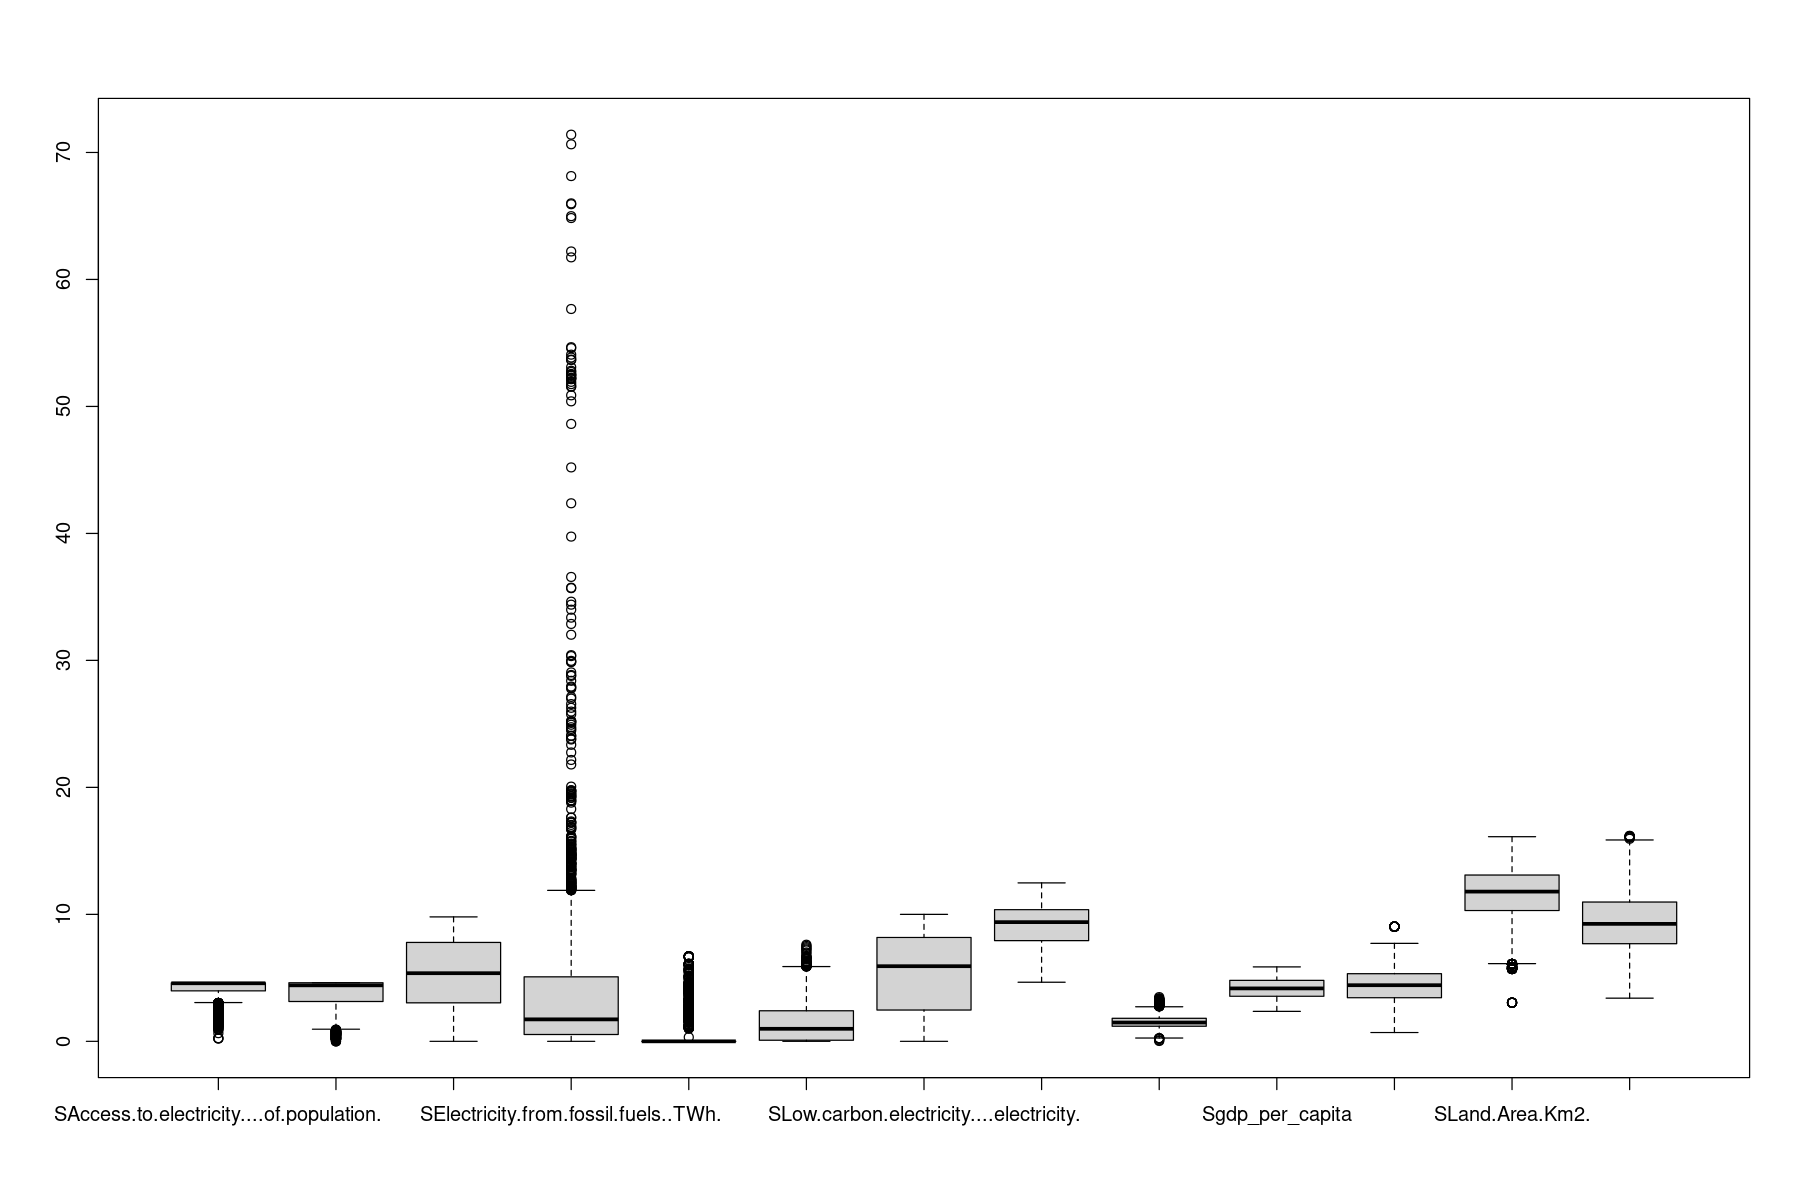

In [40]:
boxplot(complete_energy[,-c(1:6)])

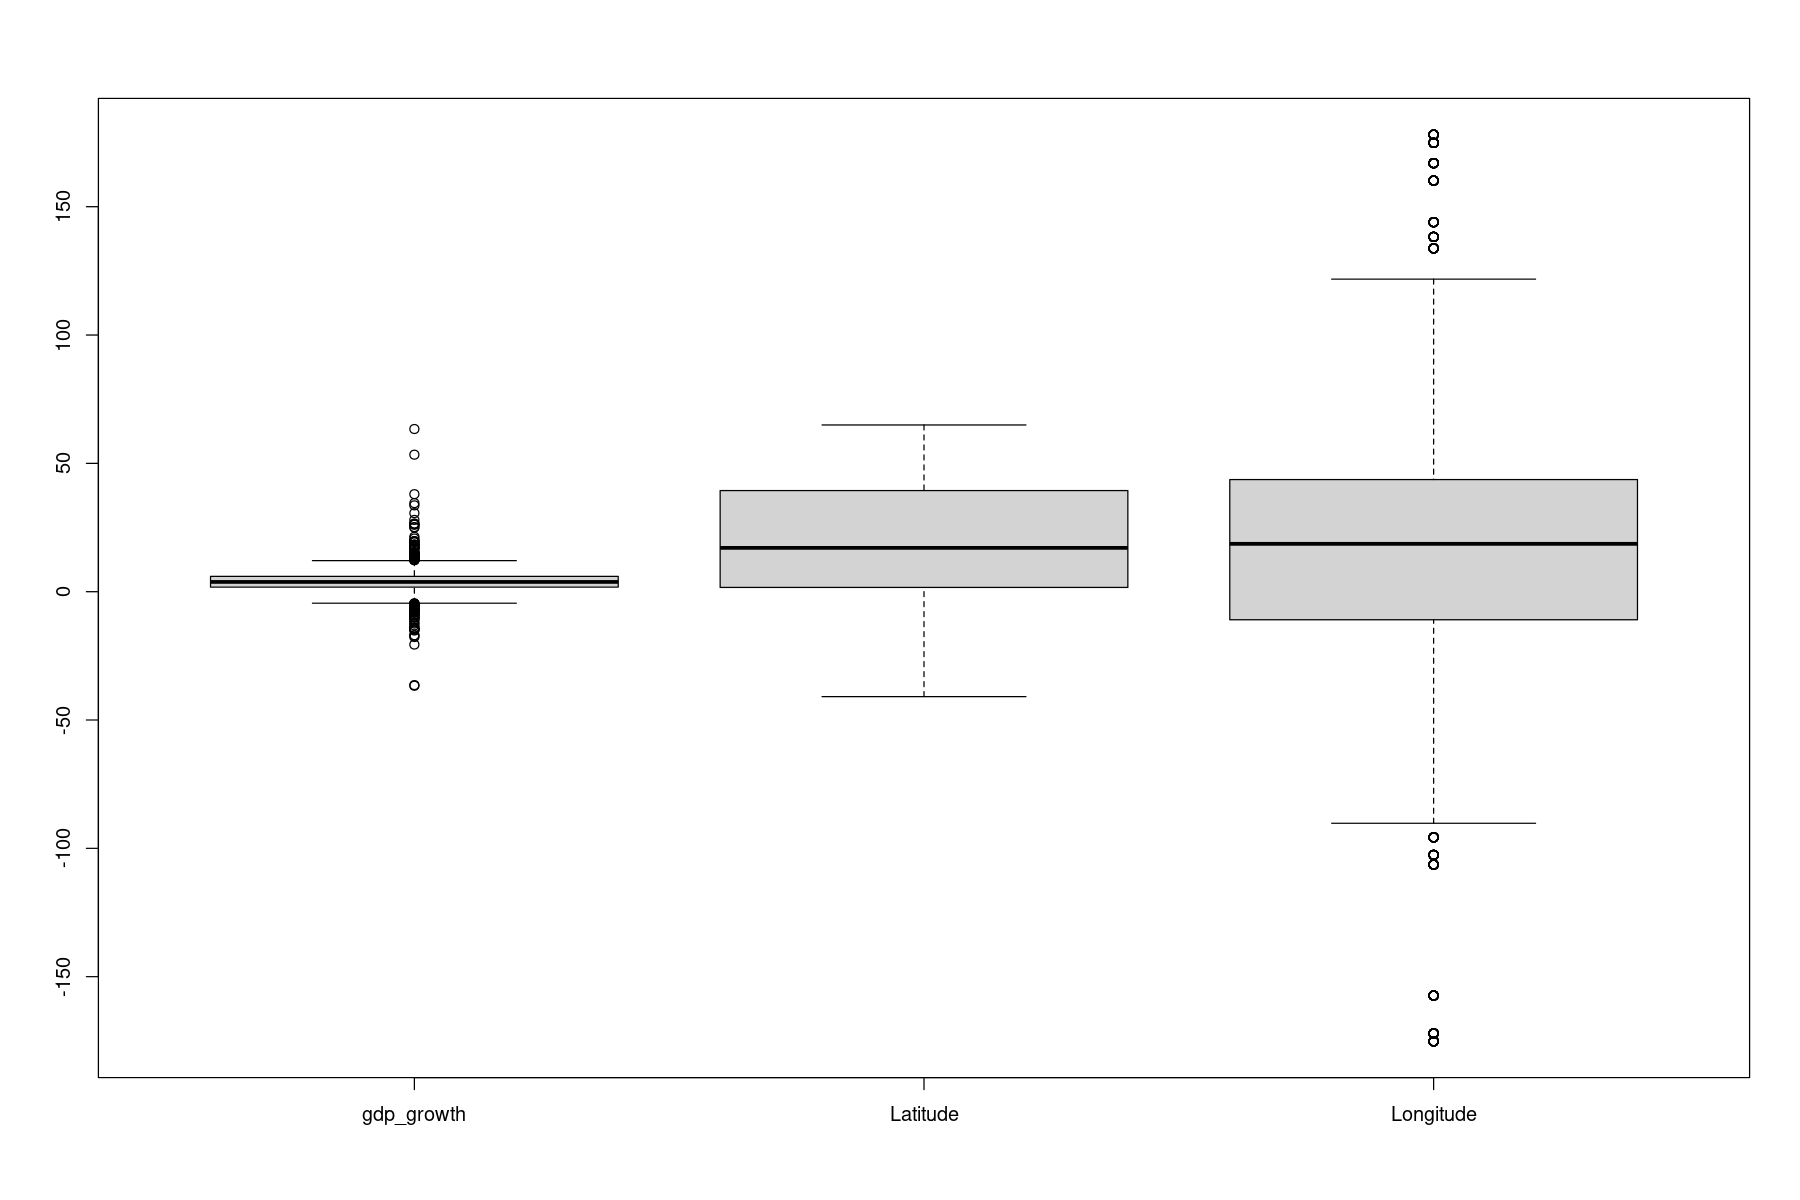

In [41]:
boxplot(complete_energy[,c(4:6)])

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 5

### Hétérogénéité d'émission de CO2 de pays

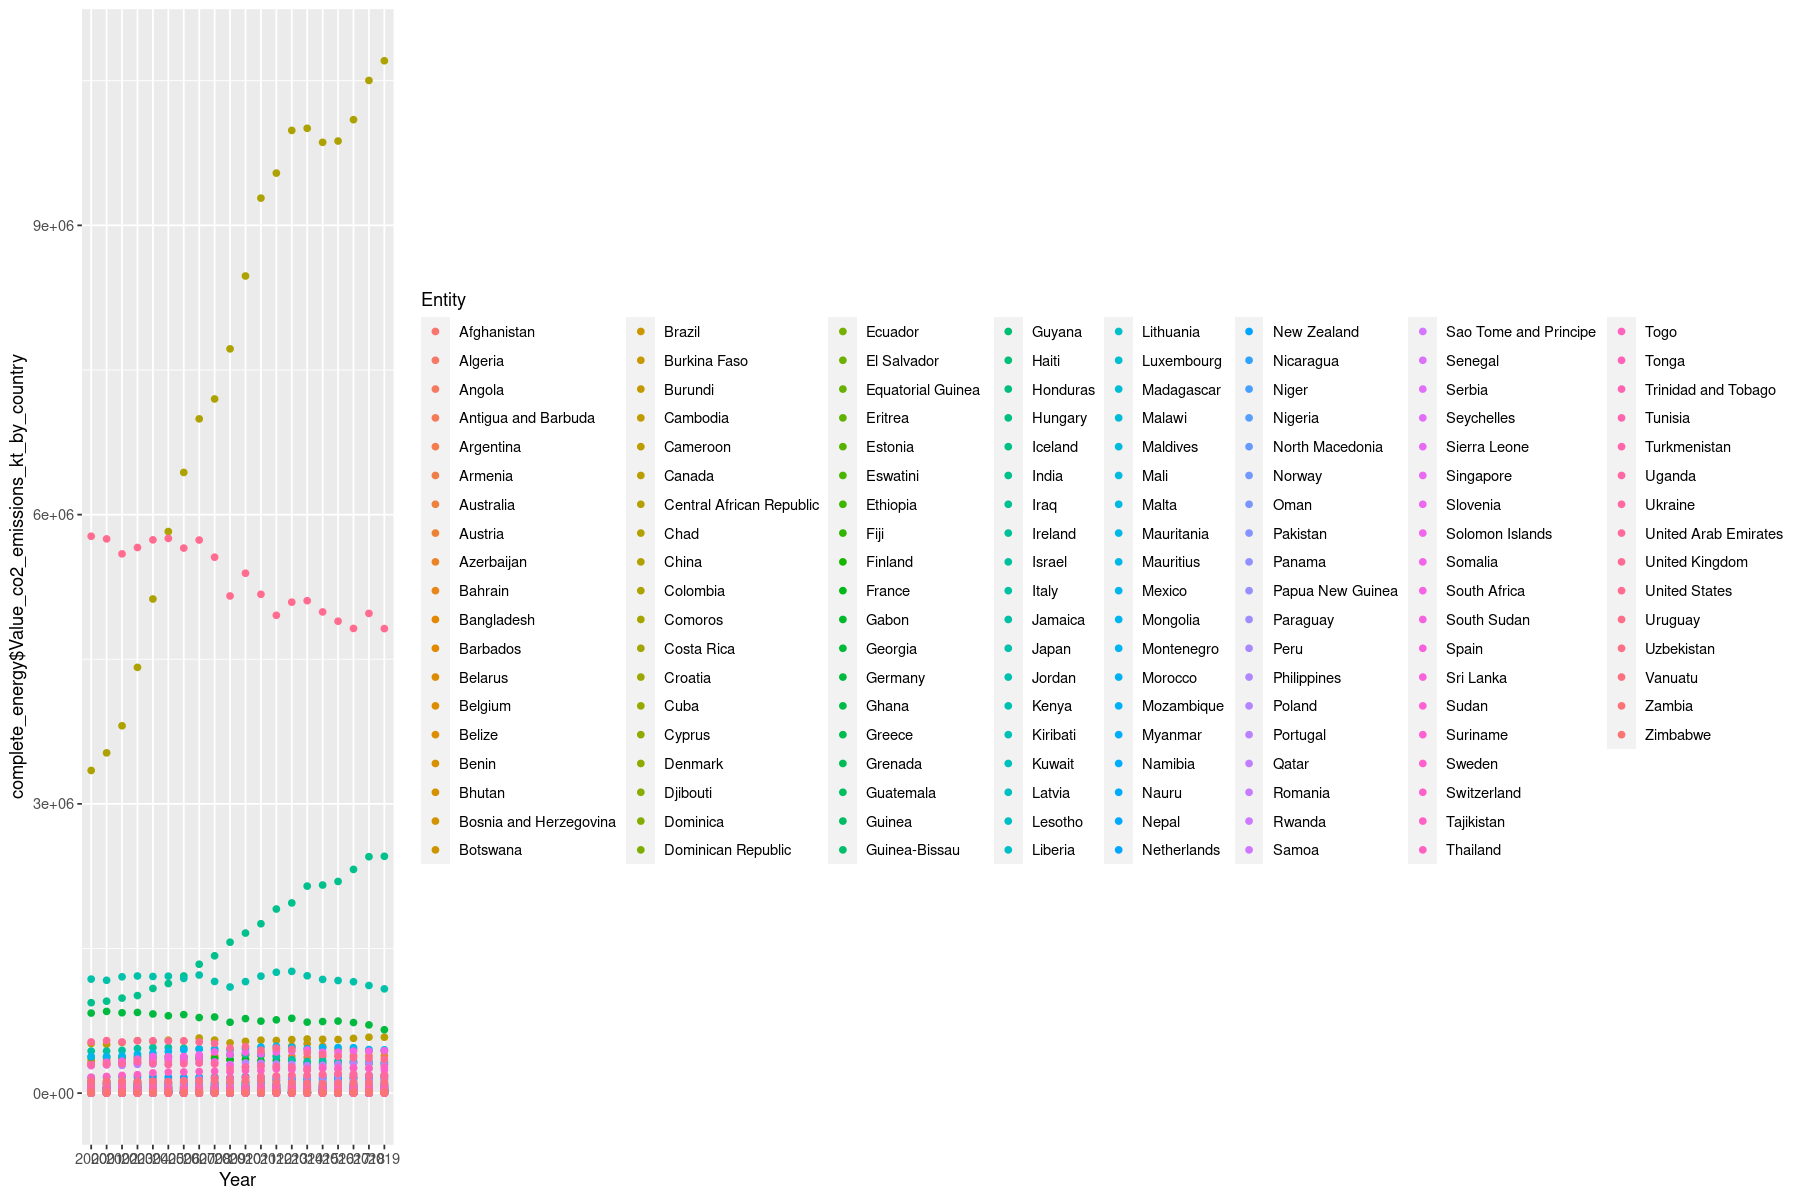

In [42]:
ggplot(complete_energy) + aes(x=Year, y=complete_energy$Value_co2_emissions_kt_by_country,color=Entity) + geom_point() + theme(legend.position = "right")

In [43]:
sd(complete_energy$Value_co2_emissions_kt_by_country)

[1] 818020.2

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont :

### Les pays les plus émetteurs de CO2

In [44]:
Moy = aggregate(data=complete_energy,Value_co2_emissions_kt_by_country~Entity,FUN=mean)
index = order(Moy$Value_co2_emissions_kt_by_country, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe)

,Entity,Value_co2_emissions_kt_by_country
,<chr>,<dbl>
28,China,7636642.5
143,United States,5329538.5
63,India,1633979.0
69,Japan,1183734.5
51,Germany,773644.5
25,Canada,547644.5


Grace à ce tableau, nous pouvons observer l'emission moyenne de CO2 emise par pays ( triée par ordre décroissant ).
Ainsi, nous pouvons donc observer que les 5 pays les plus émetteurs sont : Chine / Etats-Unis / Inde / Japon / Allemagne

## Question 6 

### Analyse descriptive multidimensionnelle

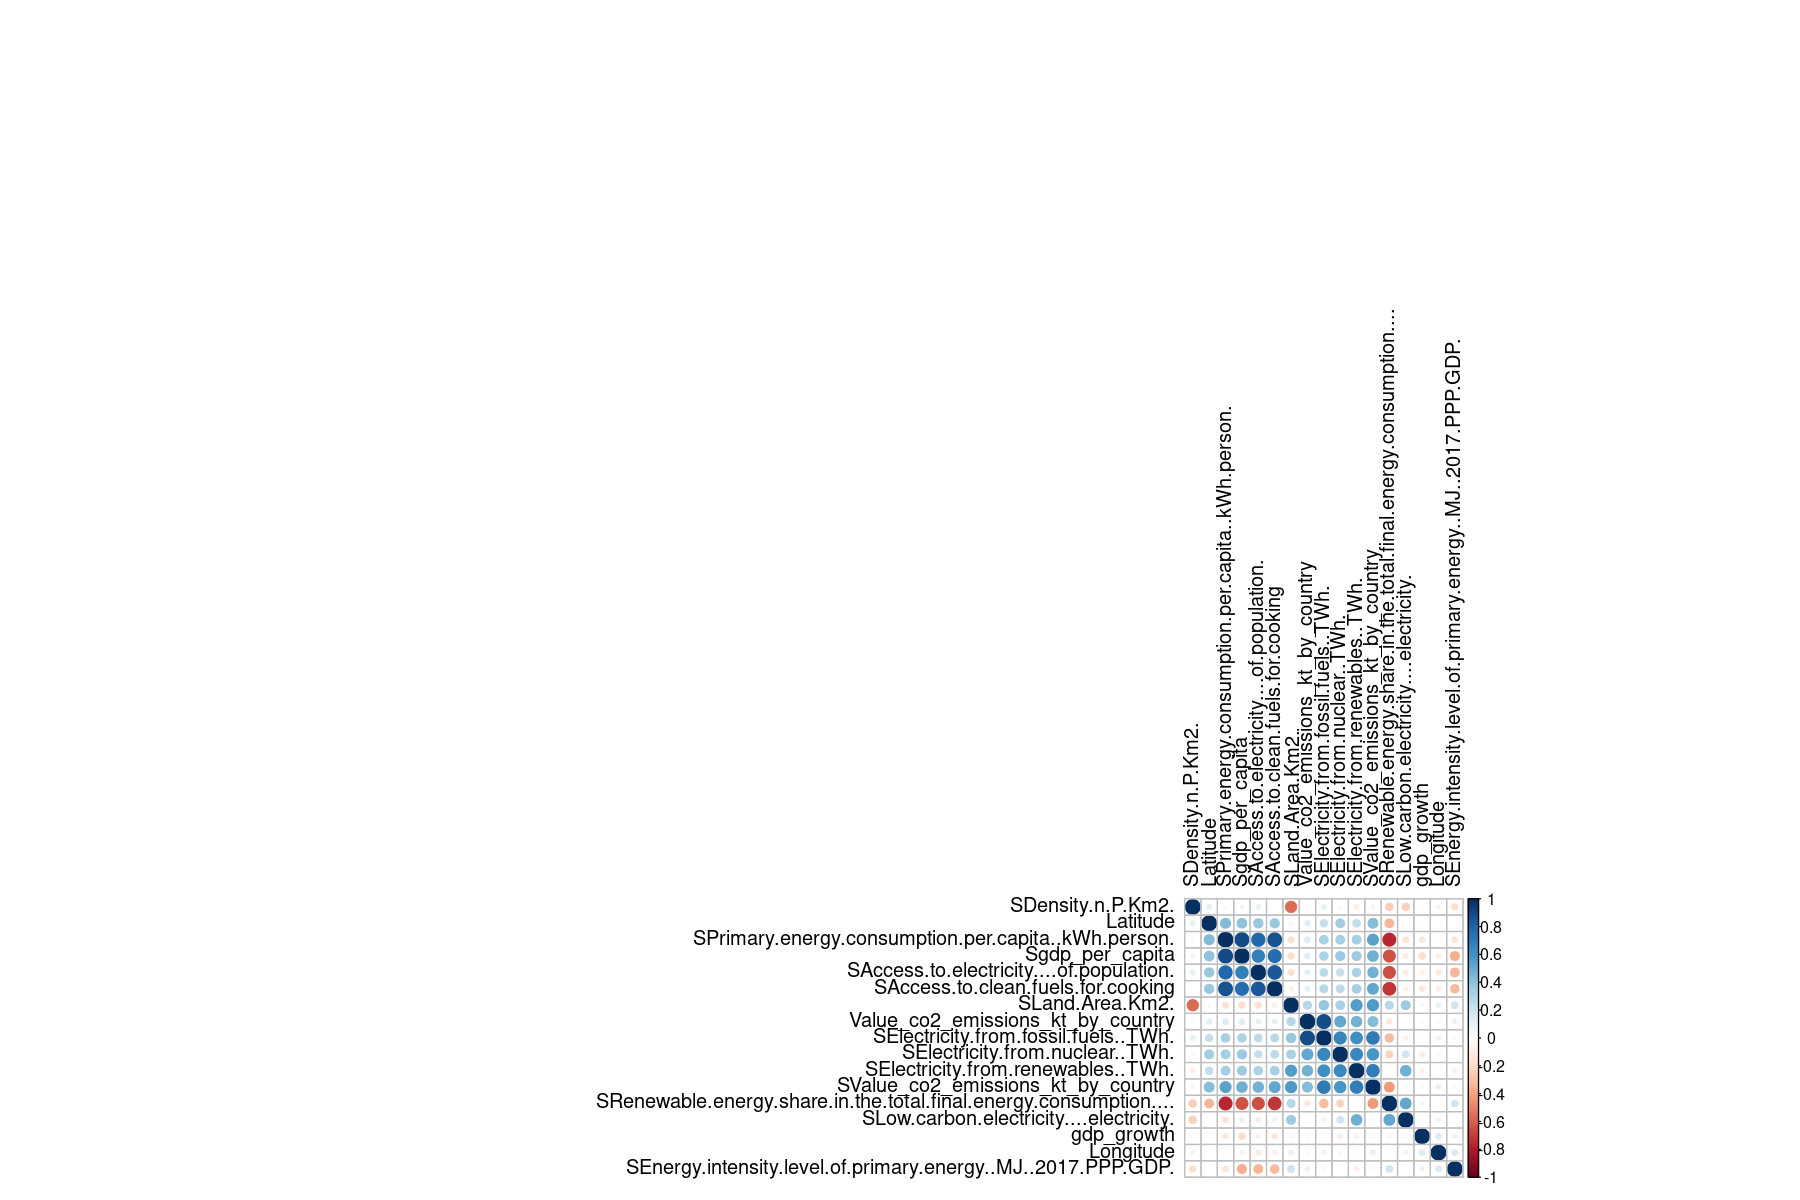

In [45]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
options(corrplot.width = 15, corrplot.height = 10)
corrplot(mcor, order="hclust", tl.col="black")

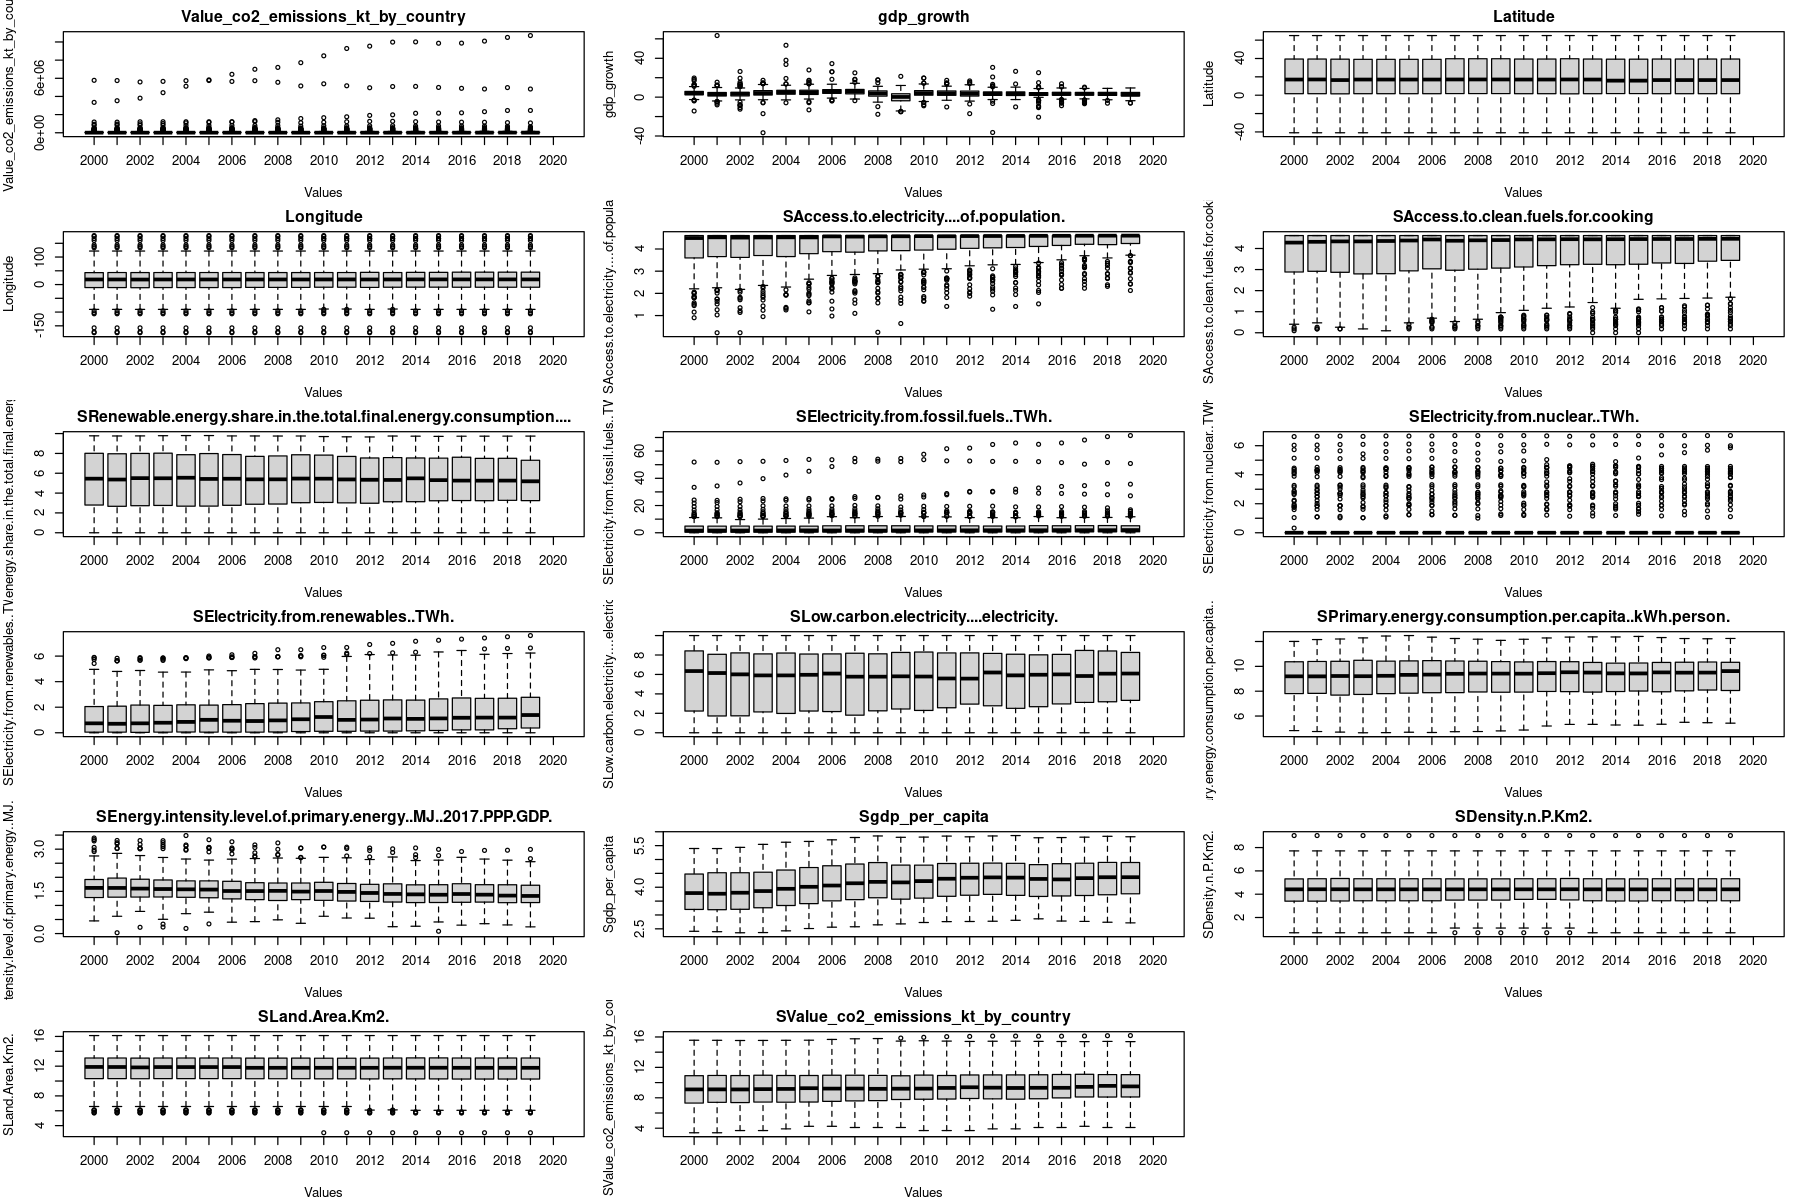

In [46]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(2,i)]
    plot(dfi, main=names(complete_energy)[i],xlab='Values')
}

## Question 7

### Analyse en composante principale

In [47]:
energy_pca = scale(complete_energy[,-c(1,2)], center = TRUE, scale = TRUE)

In [48]:
resultat_pca = PCA(energy_pca)
get_eig(resultat_pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,5.654741853,33.26318737,33.26319
Dim.2,3.213554373,18.90326102,52.16645
Dim.3,1.683492404,9.90289649,62.06934
Dim.4,1.234894867,7.26408745,69.33343
Dim.5,1.008999710,5.93529241,75.26872
Dim.6,0.917028282,5.39428401,80.66301
Dim.7,0.853111509,5.01830299,85.68131
Dim.8,0.655195298,3.85408999,89.53540
Dim.9,0.523137873,3.07728160,92.61268
Dim.10,0.431582390,2.53871994,95.15140


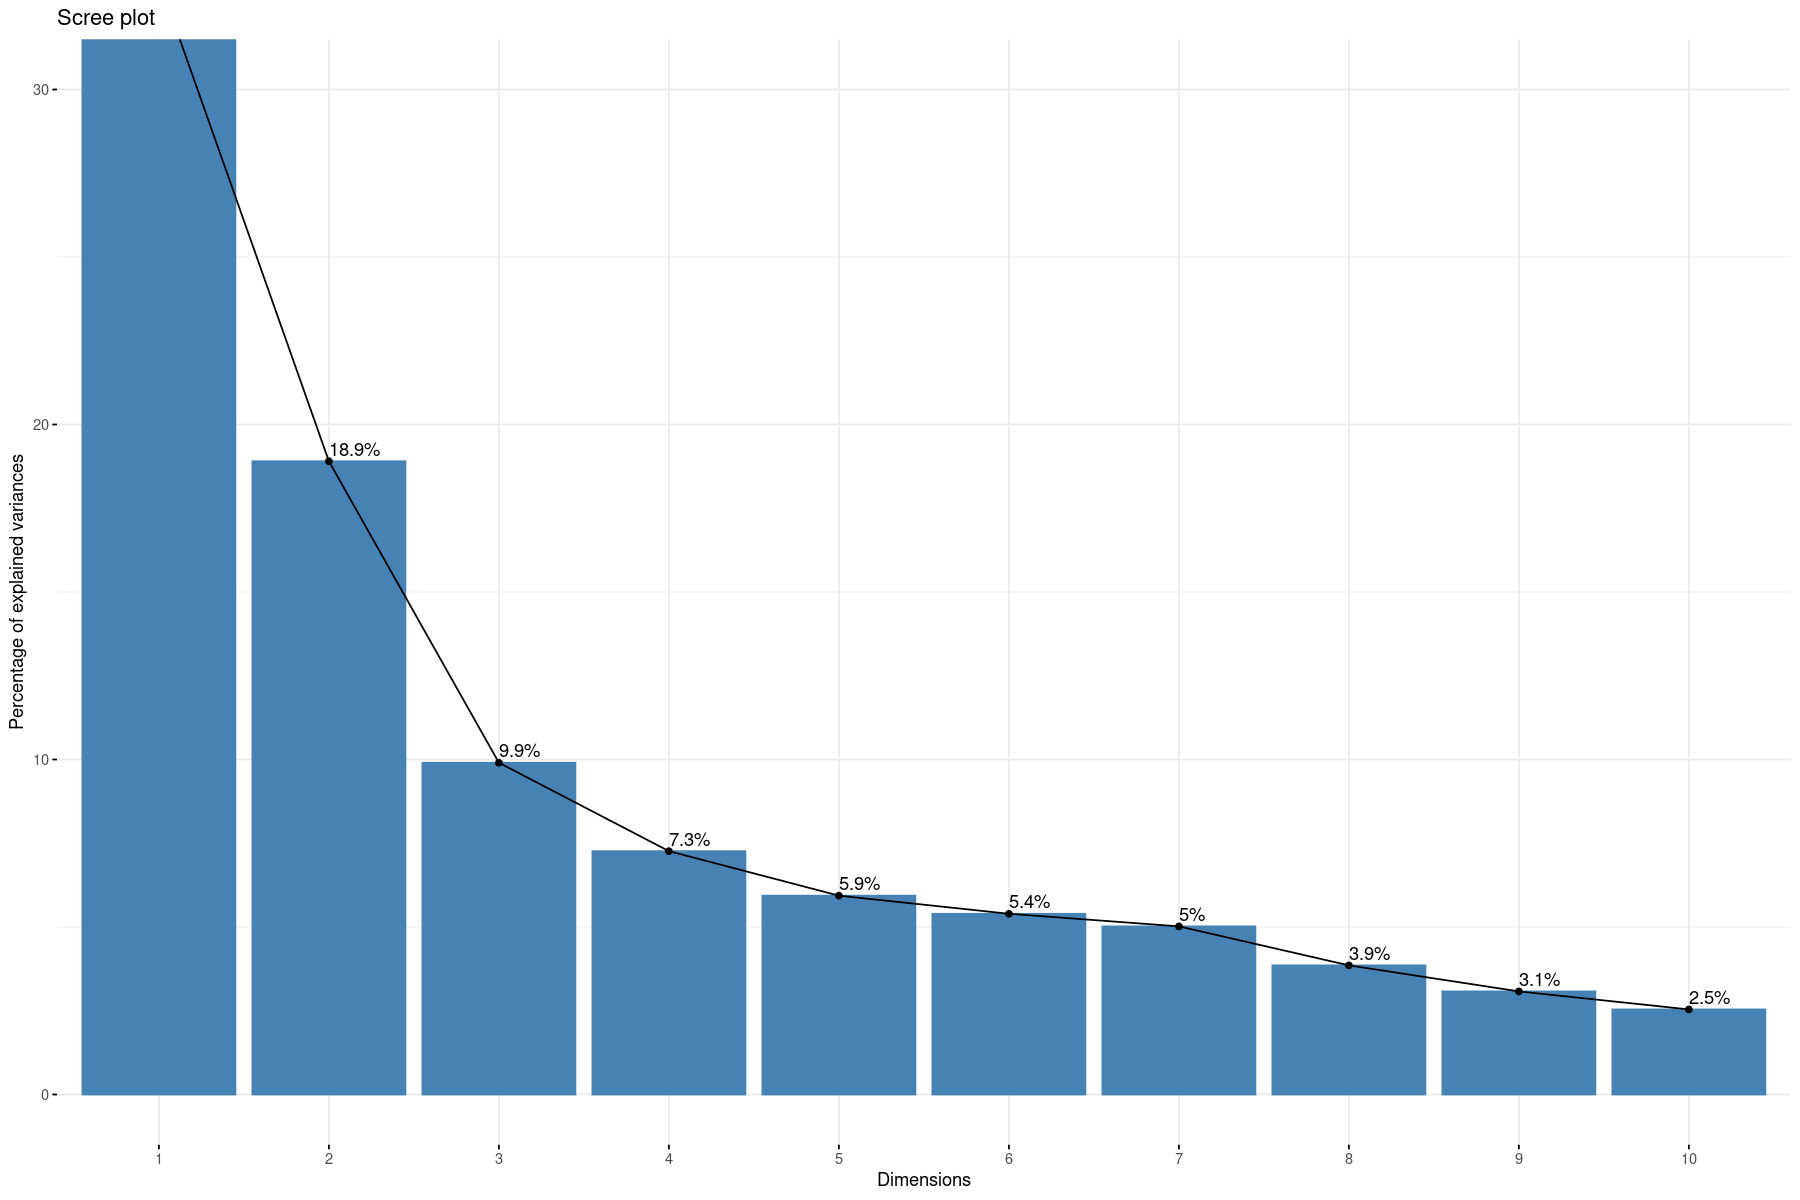

In [49]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,30))

Nous pouvons en effet voir par cette ACP, que la première composante explique 28.1% des valeurs du energy set.La deuxième composante, elle représente 20%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 5 dimensions pour avoir 80% des valeurs expliquées. Ce n'est pas forcément très efficace car à partir de la 3ème dimension, celles-ci explique entre 3.3 et 8.6%, ce qui est très faible. 

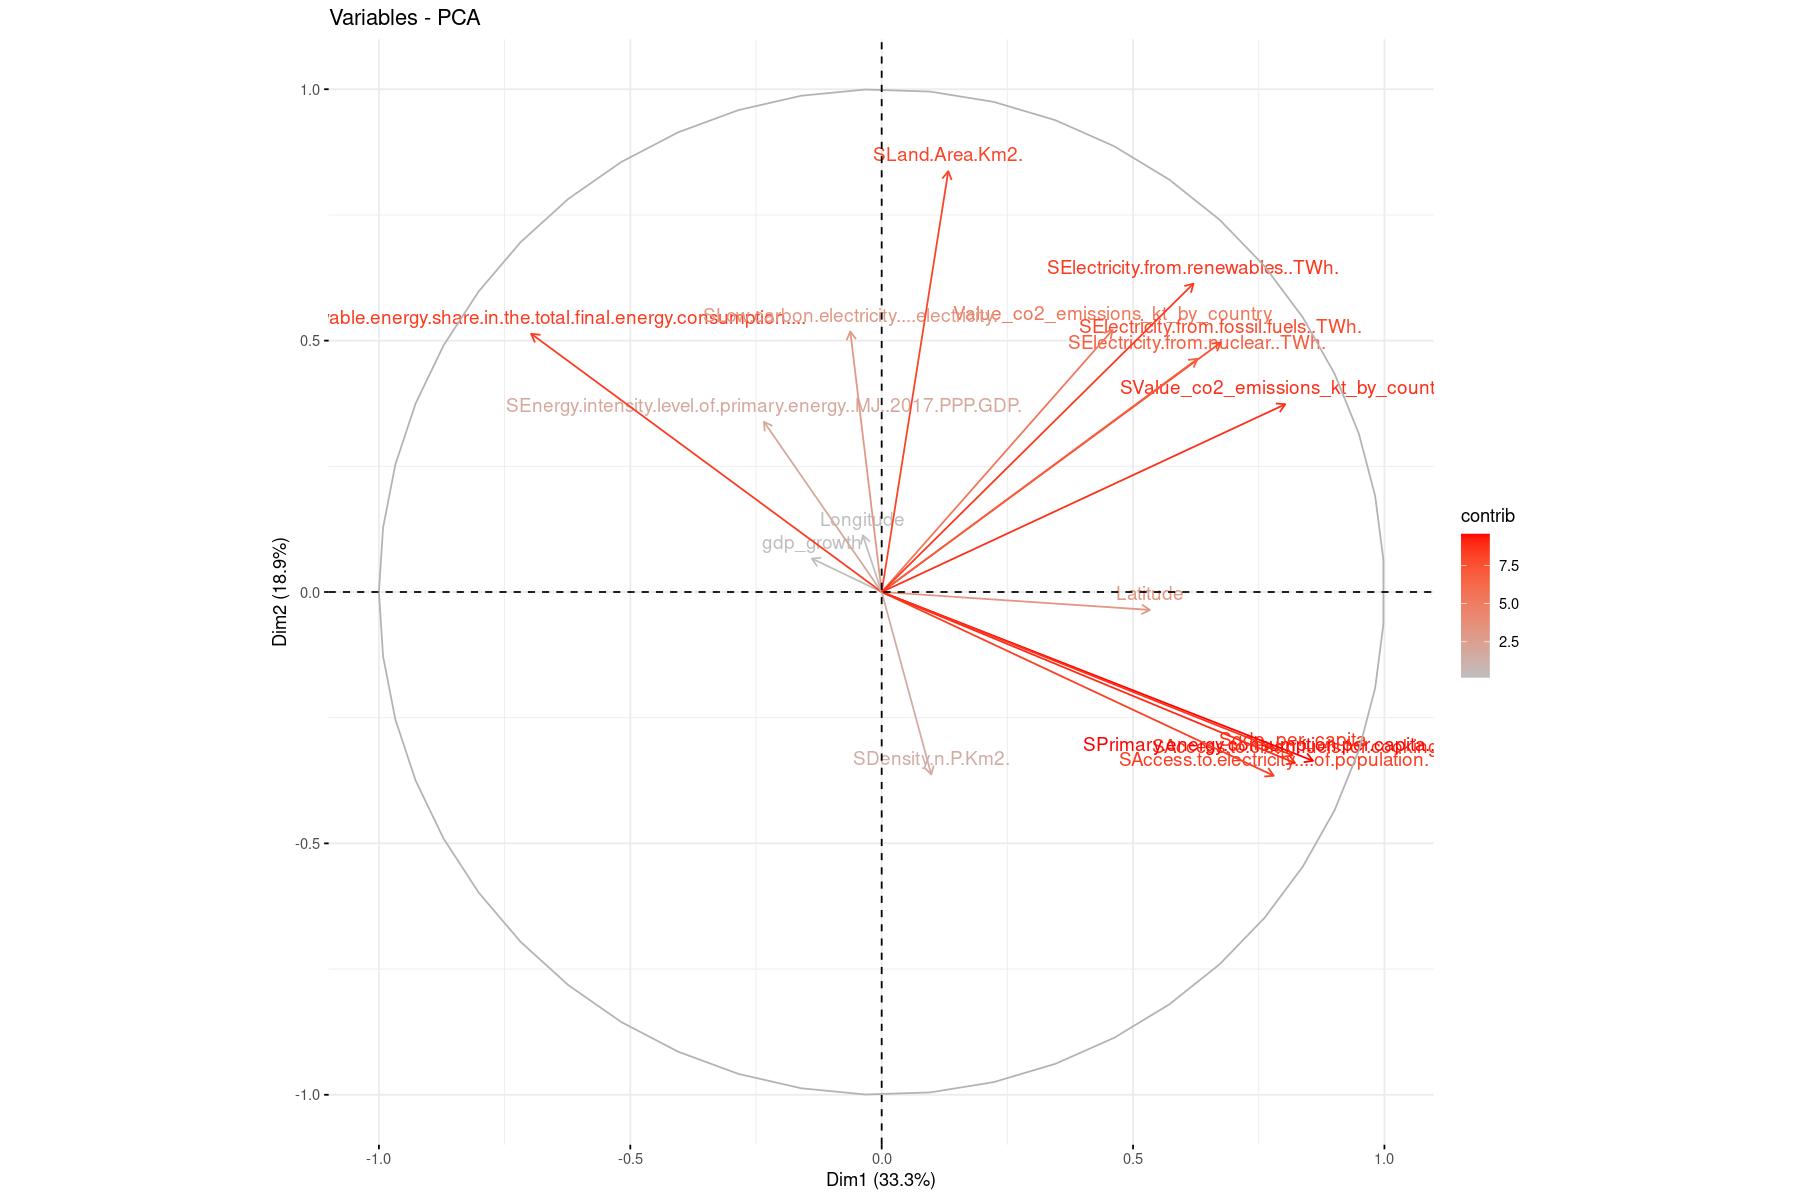

In [50]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

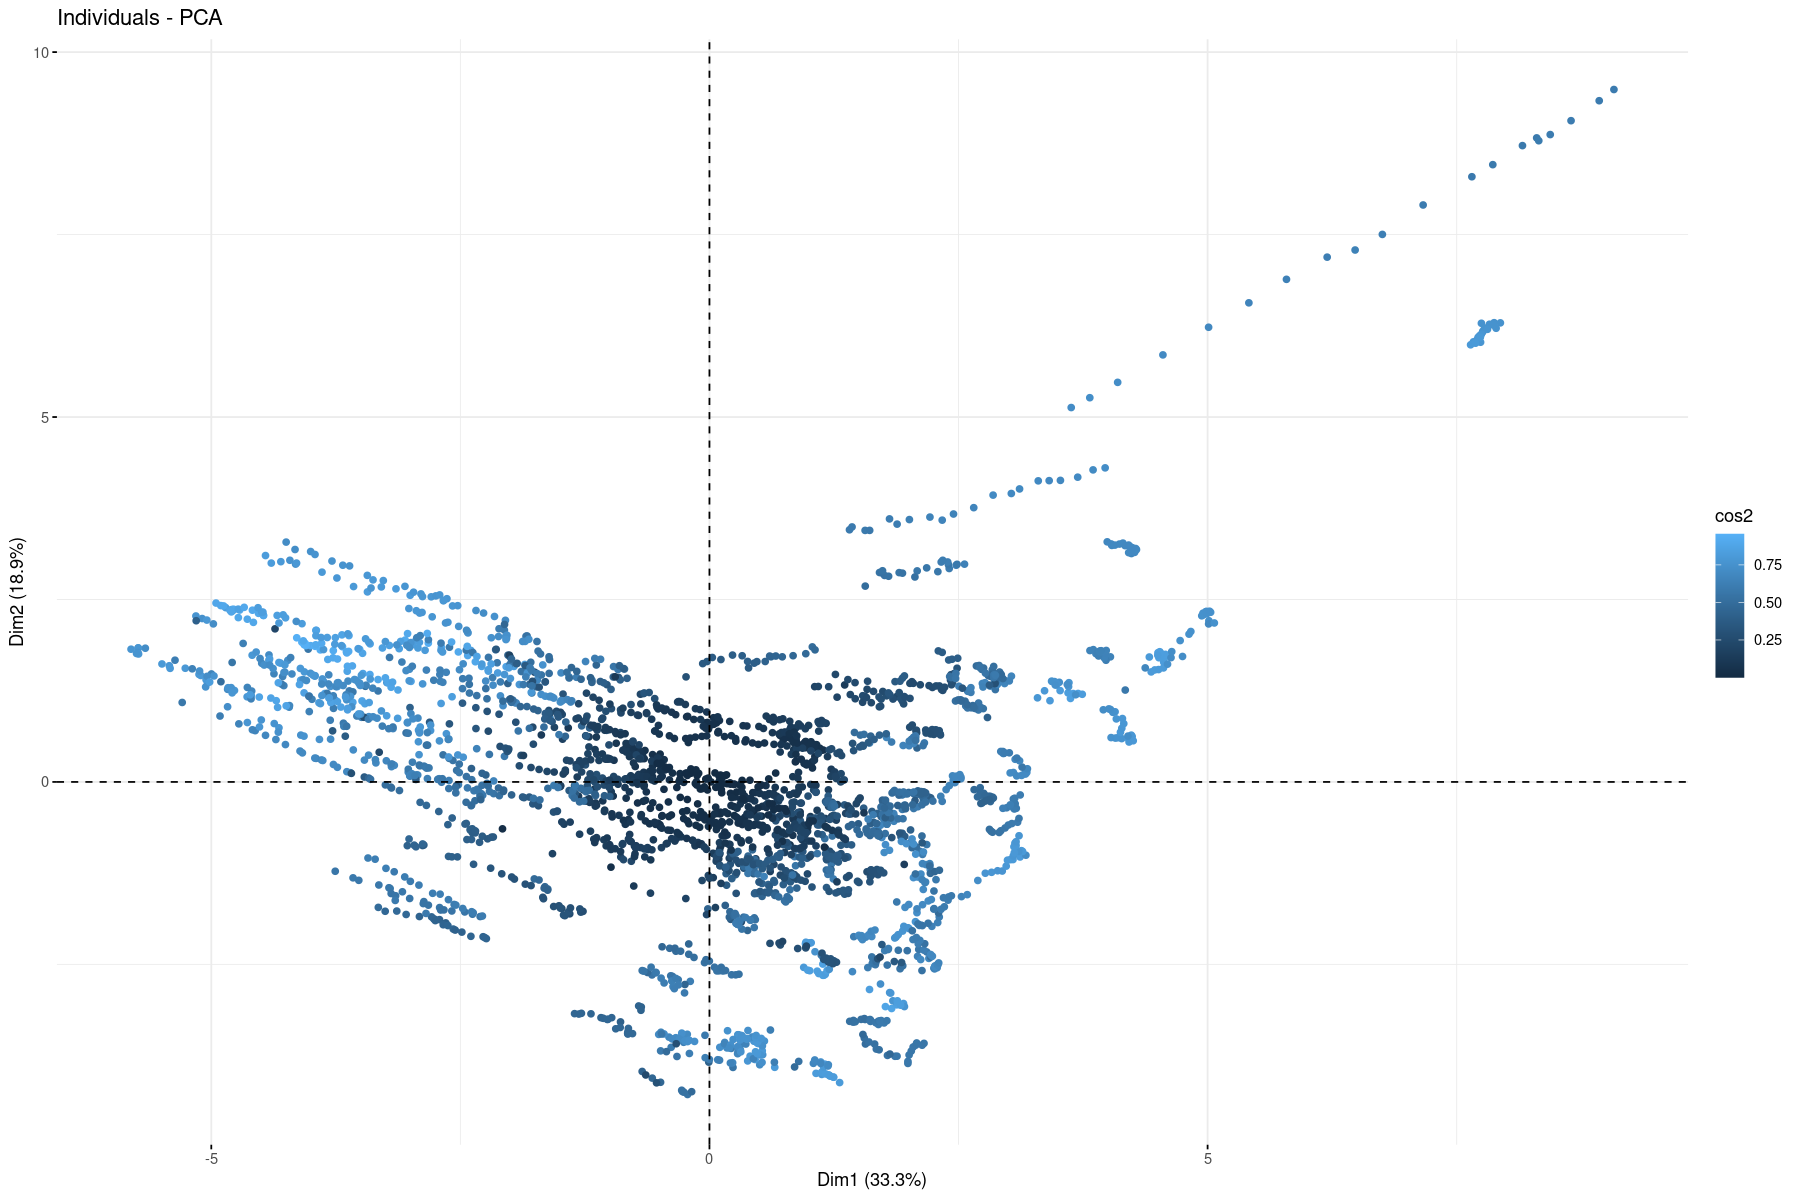

In [58]:
fviz_pca_ind(resultat_pca, label= "none", col.ind="cos2")

## Question 8

### Dépendance entre Year et la variable à prédire

In [52]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
mcor

,Value_co2_emissions_kt_by_country,gdp_growth,Latitude,Longitude,SAccess.to.electricity....of.population.,SAccess.to.clean.fuels.for.cooking,SRenewable.energy.share.in.the.total.final.energy.consumption....,SElectricity.from.fossil.fuels..TWh.,SElectricity.from.nuclear..TWh.,SElectricity.from.renewables..TWh.,SLow.carbon.electricity....electricity.,SPrimary.energy.consumption.per.capita..kWh.person.,SEnergy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Sgdp_per_capita,SDensity.n.P.Km2.,SLand.Area.Km2.,SValue_co2_emissions_kt_by_country
Value_co2_emissions_kt_by_country,1.000000000,0.03411701,0.120536382,0.041251083,0.11308697,0.106404221,-0.124085468,0.88418798,0.51694987,0.47186494,-0.007522328,0.14754652,0.082319000,0.13005368,0.032995225,0.28981280,0.43283514
gdp_growth,0.034117009,1.00000000,-0.020155317,0.145424368,-0.08667138,-0.125061004,0.054686042,-0.02392442,-0.10640649,-0.08729166,-0.038391075,-0.12381293,0.086864961,-0.18713373,0.024485165,0.04376595,-0.03950100
Latitude,0.120536382,-0.02015532,1.000000000,0.005383208,0.37729860,0.374115257,-0.331451213,0.23444695,0.34351162,0.24942674,-0.028380329,0.43592091,-0.002025071,0.40517857,0.103062783,0.04579068,0.42355041
Longitude,0.041251083,0.14542437,0.005383208,1.000000000,-0.11742990,-0.093581473,0.002843847,0.07971201,-0.04639686,-0.02368068,-0.073863556,-0.02295305,0.150443869,-0.08005765,0.061326129,0.09153225,0.10212995
SAccess.to.electricity....of.population.,0.113086972,-0.08667138,0.377298604,-0.117429902,1.00000000,0.840577284,-0.646676860,0.26488052,0.23236483,0.31676661,-0.106213894,0.78787031,-0.333426130,0.68961885,0.107866718,-0.15912208,0.47689118
SAccess.to.clean.fuels.for.cooking,0.106404221,-0.12506100,0.374115257,-0.093581473,0.84057728,1.000000000,-0.718101562,0.27530791,0.26583242,0.33193606,-0.072790931,0.86123292,-0.316369169,0.76187186,0.001223283,-0.08967160,0.51751101
SRenewable.energy.share.in.the.total.final.energy.consumption....,-0.124085468,0.05468604,-0.331451213,0.002843847,-0.64667686,-0.718101562,1.000000000,-0.31325194,-0.22005993,0.01143427,0.512679572,-0.75105580,0.192684146,-0.63571190,-0.243306668,0.28138182,-0.42225188
SElectricity.from.fossil.fuels..TWh.,0.884187976,-0.02392442,0.234446949,0.079712007,0.26488052,0.275307913,-0.313251936,1.00000000,0.65818060,0.61245018,-0.082164870,0.32859055,0.034466085,0.31089742,0.102477254,0.38633521,0.70961801
SElectricity.from.nuclear..TWh.,0.516949866,-0.10640649,0.343511618,-0.046396859,0.23236483,0.265832415,-0.220059929,0.65818060,1.00000000,0.64193710,0.198956621,0.33973304,0.004856070,0.36722700,0.034311116,0.32743667,0.58046534
SElectricity.from.renewables..TWh.,0.471864935,-0.08729166,0.249426737,-0.023680676,0.31676661,0.331936061,0.011434267,0.61245018,0.64193710,1.00000000,0.487452376,0.33815050,-0.086412003,0.35977141,-0.098983338,0.55175227,0.69550200


Ici, nous avons la matrice de corrélation entre toutes les variables de notre energyset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [53]:
correlation_value=cor(as.numeric(complete_energy$Year), complete_energy$Value_co2_emissions_kt_by_country)
print(correlation_value) # méthode pour avoir le coefficient directement 

[1] 0.02055306


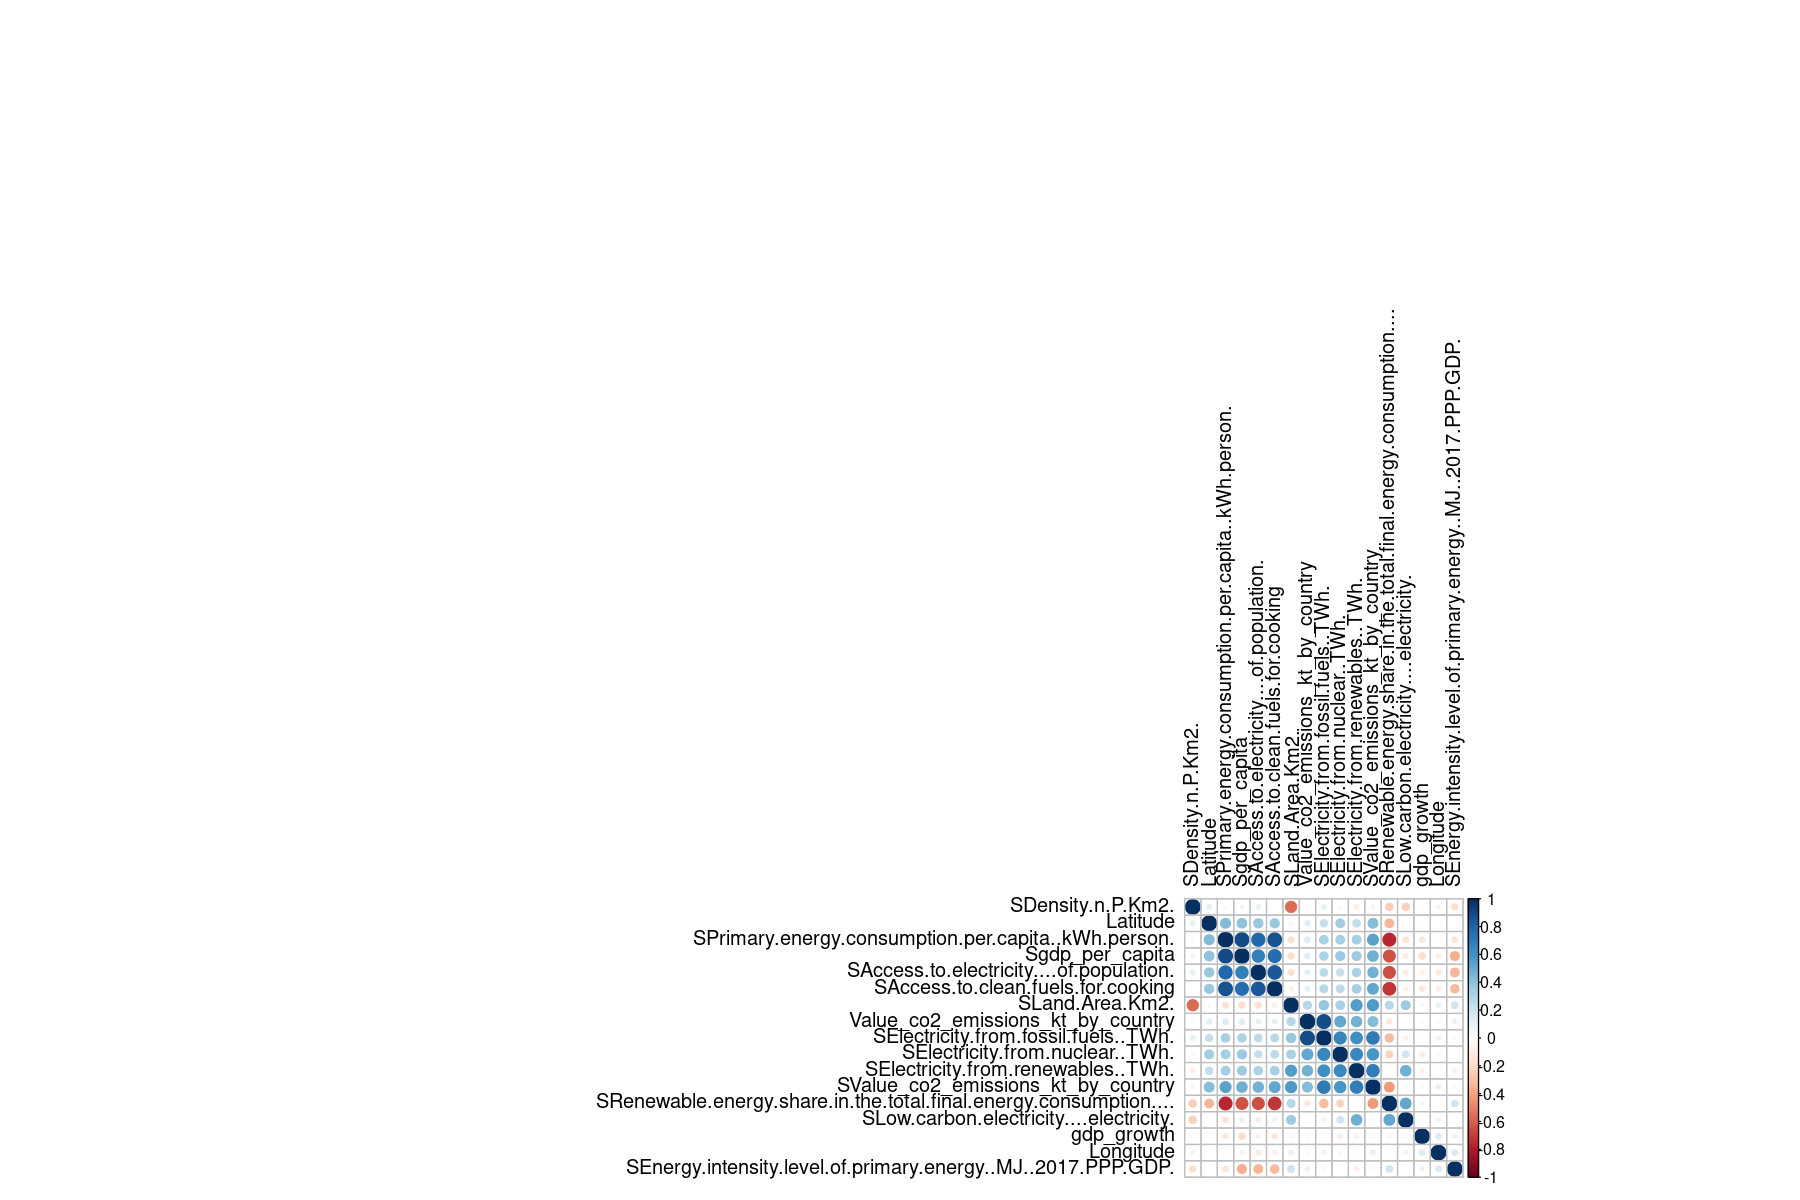

In [54]:
options(corrplot.width = 15, corrplot.height = 10)
corrplot(mcor, order="hclust", tl.col="black")

In [55]:

# Convertir la matrice en format long pour ggplot2
correlation_long <- as.energy.frame(as.table(mcor))
names(correlation_long) <- c("Variable1", "Variable2", "Correlation")

# Créer un corrélogramme avec ggplot2
ggplot(correlation_long, aes(x = Variable1, y = Variable2, fill = Correlation)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1,1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) +
  coord_fixed()


ERROR: Error in as.energy.frame(as.table(mcor)): impossible de trouver la fonction "as.energy.frame"
